##Sentimental Analysis

###Merge data

Note!!! It takes very long to merge and do the sentiment analysis on the data. 
Skip to the Exploratory Data Analysis part if you already have the file 'merged_data.csv' created

In [ ]:
!pip install vaderSentiment
!pip install wordcloud

In [ ]:
import pandas as pd
import csv 
tc_df = pd.read_csv('Tweet Data/Company_Tweet.csv')
company_df = pd.read_csv('Tweet Data/Company.csv')
tweet_df = pd.read_csv('Tweet Data/Tweet.csv')
merged_df = pd.merge(tweet_df, tc_df, on="tweet_id")

merged_df

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def sentimentAnalysis(tweet):
    return analyzer.polarity_scores(tweet)["compound"]
merged_df["sentiment"] = merged_df.body.apply(sentimentAnalysis)

In [ ]:
import os
merged_df.to_csv("merged_data.csv")

##Explonatory analysis of sentimental data : 

In [1]:
import pandas as pd

In [2]:
data_df = pd.read_csv('merged_dataset.csv')

In [3]:
data_df.index = pd.to_datetime(data_df.pop('post_date'), unit='s')

In [4]:
data_df.columns

Index(['Unnamed: 0', 'tweet_id', 'writer', 'body', 'comment_num',
       'retweet_num', 'like_num', 'ticker_symbol', 'sentiment'],
      dtype='object')

In [5]:
apple_df = data_df[data_df.ticker_symbol == "AAPL"]
google1_df = data_df[data_df.ticker_symbol == "GOOG"]
google2_df = data_df[data_df.ticker_symbol == "GOOGL"]
amazon_df = data_df[data_df.ticker_symbol == "AMZN"]
tesla_df = data_df[data_df.ticker_symbol == "TSLA"]
msft_df = data_df[data_df.ticker_symbol == "MSFT"]

In [6]:
apple_df.head()

,Unnamed: 0,tweet_id,writer,body,comment_num,retweet_num,like_num,ticker_symbol,sentiment
post_date,,,,,,,,,
2015-01-01 00:00:57,0,550441509175443456,VisualStockRSRC,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,0.0000
2015-01-01 00:01:36,1,550441672312512512,KeralaGuy77,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,-0.8271
2015-01-01 00:10:05,4,550443807834402816,i_Know_First,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,0.0000
2015-01-01 00:10:05,6,550443808606126081,aaplstocknews,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,0.0000
2015-01-01 00:10:05,8,550443809700851716,iknowfirst,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,0.0000


###Wordcloud

In [ ]:
#getting the tweets with only a positive sentiment 
df = pd.read_csv('merged_dataset.csv')  
pos_df = df[df.sentiment > 0]
#pos_tweets = " ".join(str(tweet) for tweet in pos_df.body)

from collections import Counter
pos_tweets = Counter(" ".join(pos_df.body).split()).most_common()

#getting the tweets with only a negative sentiment 
#neg_df = df[df.sentiment < 0]
#neg_tweets = " ".join(str(tweet) for tweet in neg_df.body)
#print ("There are {} words in the combination of all review.".format(len(neg_tweets)))

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords2= {"I", "&", "The", "A"}
stopwords = set.union(stopwords,stopwords2)

fil_pos = []
for word,count in pos_tweets:
    if not word.startswith("$") and word not in stopwords:
        fil_pos.append((word,count))

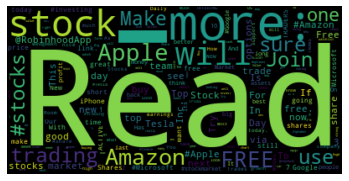

In [ ]:
#everything with a minus sign is negative
#everything with a plus sign is a positive
#generate wordclouds for the tweets with the most occuring words in positive tweets

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=dict(fil_pos))
plt.figure()

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###Going into the tweets

In [ ]:
pos_df = df[df.sentiment > 0]
#pos_tweets = " ".join(str(tweet) for tweet in pos_df.body)

from collections import Counter
pos_tweets = Counter(" ".join(pos_df.body).split()).most_common()

In [ ]:
df.describe()

,Unnamed: 0,tweet_id,post_date,comment_num,retweet_num,like_num,sentiment
count,4.336445e+06,4.336445e+06,4.336445e+06,4.336445e+06,4.336445e+06,4.336445e+06,4.336445e+06
mean,2.168222e+06,8.834282e+17,1.499461e+09,2.923863e-01,6.347647e-01,2.103625e+00,1.255484e-01
std,1.251824e+06,1.927735e+17,4.596080e+07,1.885788e+00,6.986371e+00,1.371744e+01,3.692502e-01
min,0.000000e+00,5.504415e+17,1.420070e+09,0.000000e+00,0.000000e+00,0.000000e+00,-9.980000e-01
25%,1.084111e+06,7.185450e+17,1.460149e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.168222e+06,8.825934e+17,1.499262e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.252333e+06,1.054776e+18,1.540313e+09,0.000000e+00,0.000000e+00,1.000000e+00,4.019000e-01
max,4.336444e+06,1.212160e+18,1.577837e+09,6.310000e+02,9.990000e+02,9.990000e+02,9.934000e-01


In [ ]:
df[df.sentiment > 0.99] #to get the highest sentiment tweets
df[df.sentiment < 0.99] #to get the lowest sentiment tweets
df[df.sentiment > 0].sort_values(by='like_num', ascending = False) #highest liked tweet
df[df.sentiment < 0].sort_values(by='like_num', ascending = False)

,Unnamed: 0,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,sentiment
2953893,2953893,1020077355346169857,vincent13031925,1532040368,"Tesla Spokesperson, Regarding The Earlier Need...",38,256,986,TSLA,-0.8043
4219385,4219385,1192441840584347648,Teslarati,1573135263,Tesla debt receives ‘Positive’ outlook from S&...,6,73,972,TSLA,-0.3612
4325476,4325476,1210396465249558530,BomsteinRick,1577415980,"My wife, who knows zero about finance, told me...",149,94,972,TSLA,-0.5267
4296552,4296552,1205863456995340289,GerberKawasaki,1576335226,So no Mercedes eq coming and a Porsche that ca...,53,114,955,TSLA,-0.3597
4099212,4099212,1173235688990339073,GerberKawasaki,1568556160,Every dollar you pay more at the pump next wee...,58,196,944,TSLA,-0.8910
...,...,...,...,...,...,...,...,...,...,...
1797747,1797747,817315427449769984,32Trades,1483698157,Jan. 6 Watch List: JOBS Report & Trade Defici...,0,1,0,GOOGL,-0.4019
1797748,1797748,817315427449769984,32Trades,1483698157,Jan. 6 Watch List: JOBS Report & Trade Defici...,0,1,0,AMZN,-0.4019
1797749,1797749,817315427449769984,32Trades,1483698157,Jan. 6 Watch List: JOBS Report & Trade Defici...,0,1,0,TSLA,-0.4019
1797795,1797795,817330522015662081,computer_hware,1483701756,"#Apple History: Acorn, a virtual click-wheel-b...",0,0,0,AAPL,-0.3182


In [ ]:
print("The tweet with one of the most negative sentiment:", df.loc[3218003].body)
print("")
print("The tweet with one of the most post sentiment:", df.loc[3938615].body)
print("")
print("A negative tweet with one of the most likes:",df.loc[2953893].body )
print("")
print("A positive tweet with one of the most likes:",df.loc[2779707].body )

The tweet with one of the most negative sentiment: Since we’ve been distracted by delivery hell, service hell, quality hell, regulator hell, creditor hell, demand hell, ZEV hell, departure hell, refi hell, and legal hell, just wanted to remind everyone of macro issues challenging $TSLA: ...

The tweet with one of the most post sentiment: Genius:exceptional intellectual or creative power or other natural ability.synonyms:brilliance, great intelligence, great intellect, great ability, cleverness, brains, erudition, wisdom, sagacity, fine mind, wit, artistry, flair, creative power, precocity, precociousness  $TSLA

A negative tweet with one of the most likes: Tesla Spokesperson, Regarding The Earlier Needham Downgrade Note, Say "The Notion That Model 3 Cancellations Are Outpacing Orders Is Unequivocally False"Are you sick of Tesla FUD?! Please Like and Retweet to stop Tesla FUD !! $TSLA @elonmusk @bonnienorman @Jason @scottwww

A positive tweet with one of the most likes: Nice of @elonmus

In [ ]:
def percentage(stock):
    percentages = []
    percentages.append(df[(df['sentiment'] > 0) & (df.ticker_symbol == stock)].count()[0]/df[df.ticker_symbol == stock].count()[0])
    percentages.append(df[(df['sentiment'] == 0) & (df.ticker_symbol == stock)].count()[0]/df[df.ticker_symbol == stock].count()[0])
    percentages.append(df[(df['sentiment'] < 0) & (df.ticker_symbol == stock)].count()[0]/df[df.ticker_symbol == stock].count()[0])
    return percentages

stock_names = ["TSLA", "GOOG", "GOOGL", "AMZN", "AAPL", "MSFT"]
df2 = pd.DataFrame(columns = stock_names)
for stock in stock_names:
    df2[stock] = percentage(stock)

In [ ]:
#there also exist tweets that don't really have a positive or negative sentiment, just like this tweet
df[df.sentiment == 0]
df.loc[3].body

'$GM $TSLA: Volkswagen Pushes 2014 Record Recall Tally Higher https://pic.twitter.com/WIIc1lW7hW @ProTradersNews http://growword.com/2015/01/01/0246.html… @theferrarifan'

Text(0.5, 1.0, 'Percentage of positive, negative and neutral sentiments of tweets across different stocks')

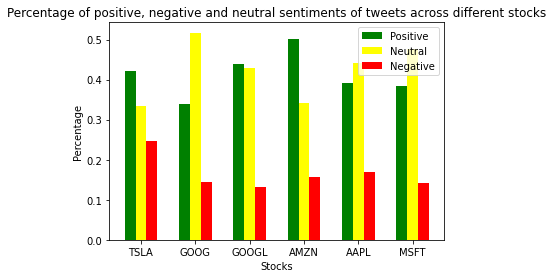

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
X_axis = np.arange(len(stock_names))
plt.bar(X_axis - 0.2, df2.loc[0].values.tolist(), 0.2, label = "Positive", color = "green")
plt.bar(X_axis, df2.loc[1].values.tolist(), 0.2, label = "Neutral", color = "yellow")
plt.bar(X_axis + 0.2, df2.loc[2].values.tolist(), 0.2, label = "Negative", color = "red")
plt.legend()
plt.xlabel("Stocks")
plt.ylabel("Percentage")
plt.xticks(X_axis,stock_names)
plt.title("Percentage of positive, negative and neutral sentiments of tweets across different stocks")

In [ ]:
df.sort_values(by='comment_num', ascending = False)

,Unnamed: 0,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,sentiment
2920317,2920317,1014983757252780033,lopezlinette,1530825959,"I’d just like to point out that right now, rig...",631,369,0,TSLA,0.7783
3734919,3734919,1118989675257978880,GerberKawasaki,1555622903,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,TSLA,0.0000
4262844,4262844,1199424478536753155,AlexSibila,1574800054,~Tesla feature request thread~Feel free to rep...,563,48,662,TSLA,0.5106
2190705,2190705,885933344487342082,internet_dust,1500057943,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,AMZN,-0.4939
3902023,3902023,1138975188127834112,TeslaNY,1560387820,“I think it's basically financially insane to ...,442,0,0,TSLA,0.2350
...,...,...,...,...,...,...,...,...,...,...
1493833,1493833,774128228315254786,computer_hware,1473401526,#Apple iPhone 7: Here's what analysts are sayi...,0,0,0,AAPL,0.0000
1493834,1493834,774128228327829504,_peripherals,1473401526,#Apple iPhone 7: Here's what analysts are sayi...,0,0,0,AAPL,0.0000
1493835,1493835,774128383663804418,_peripherals,1473401563,#Apple iWork Gets Real-Time Collaboration. Rea...,0,0,0,AAPL,0.0000
1493836,1493836,774128408905199616,1MinuteStock,1473401569,Unicorn Bay rating for $GOOG is 2.86 out of 5.,0,0,0,GOOG,0.0000


###Get tweet score of each company

In [7]:
#Get the tweetscore of each company over the time

# apple_df = apple_df.groupby([apple_df['Date_Time'].dt.date]).mean()
apple_df_time_sentiment = apple_df.groupby([apple_df.index.date]).agg({'sentiment': ['mean', 'min', 'max']})
google1_df_time_sentiment = google1_df.groupby([google1_df.index.date]).agg({'sentiment': ['mean', 'min', 'max']})
google2_df_time_sentiment = google2_df.groupby([google2_df.index.date]).agg({'sentiment': ['mean', 'min', 'max']})
amazon_df_time_sentiment = amazon_df.groupby([amazon_df.index.date]).agg({'sentiment': ['mean', 'min', 'max']})
tesla_df_time_sentiment = tesla_df.groupby([tesla_df.index.date]).agg({'sentiment': ['mean', 'min', 'max']})
msft_df_time_sentiment = msft_df.groupby([msft_df.index.date]).agg({'sentiment': ['mean', 'min', 'max']})

###Plot the 5 graphs of tweet score

<Figure size 2160x1440 with 0 Axes>

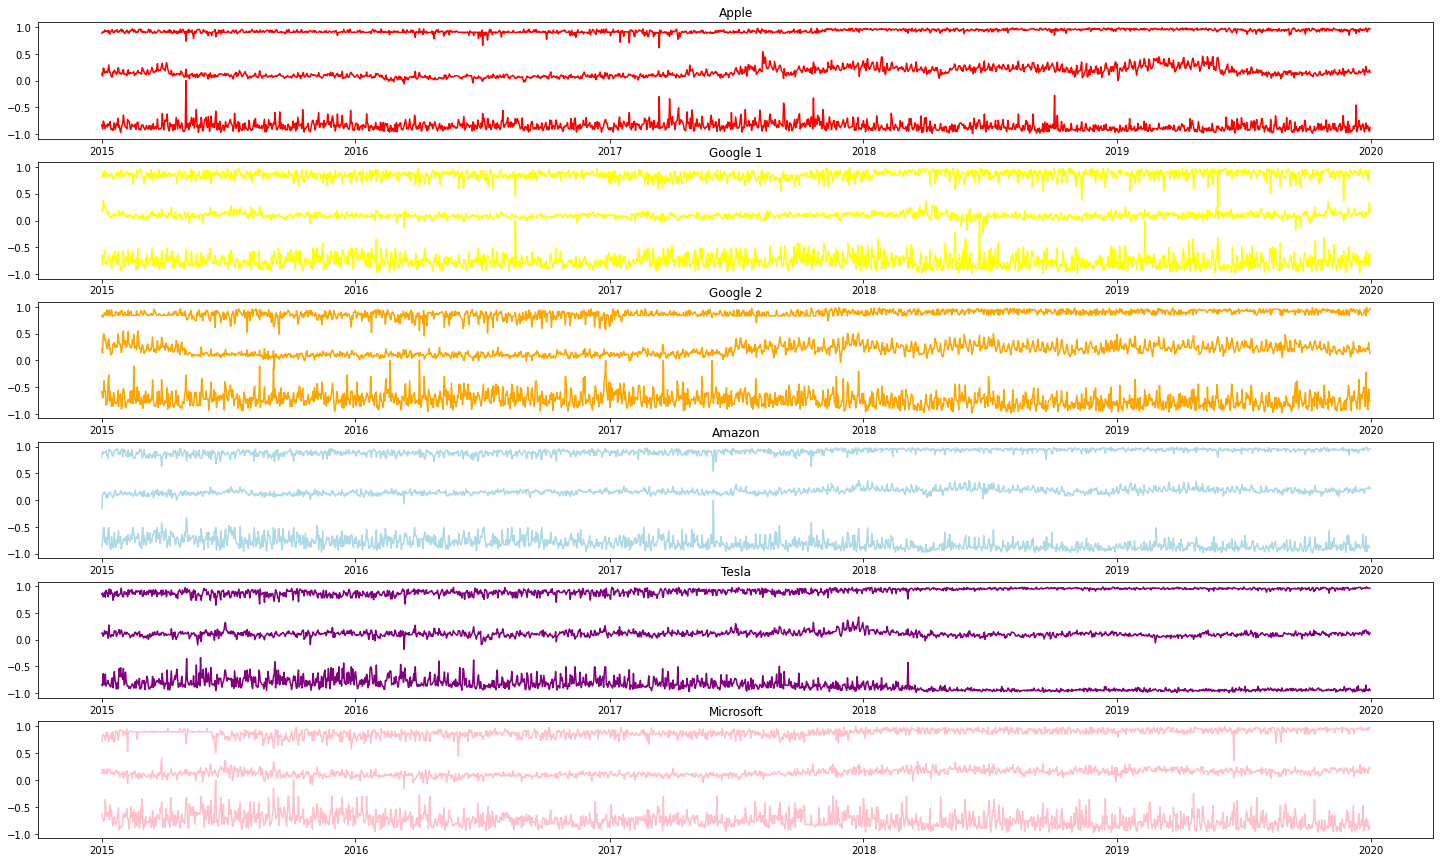

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(30, 20))

fig, ax = plt.subplots(6,1, figsize=(25,15))

ax[0].plot(apple_df_time_sentiment.index,apple_df_time_sentiment,  c="red")
ax[0].set_title("Apple")
ax[1].plot(google1_df_time_sentiment.index,google1_df_time_sentiment, c="yellow")
ax[1].set_title("Google 1")
ax[2].plot(google2_df_time_sentiment.index,google2_df_time_sentiment, c="orange")
ax[2].set_title("Google 2")
ax[3].plot(amazon_df_time_sentiment.index,amazon_df_time_sentiment, c="lightblue")
ax[3].set_title("Amazon")
ax[4].plot(tesla_df_time_sentiment.index,tesla_df_time_sentiment, c="purple")
ax[4].set_title("Tesla")
ax[5].plot(msft_df_time_sentiment.index,msft_df_time_sentiment, c="pink")
ax[5].set_title("Microsoft")

plt.show()

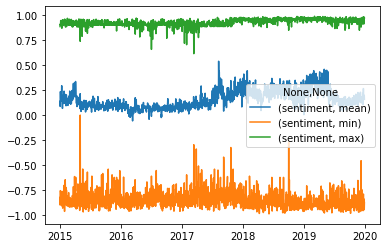

In [ ]:
#If you want to print it individually, here for ex. apple
apple_df_time_sentiment.plot()

## Stocks

###Import data

In [8]:
%pip install yfinance

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=f27b468b0474538afb6574f828904c03f034ea0569151ffd8e58371c49f1a6ac
  Stored in directory: c:\users\sunny\appdata\local\pip\cache\wheels\34\ba\79\c0260c6f1a03f420ec7673eff9981778f293b9107974679e36
Successfully built multitasking
  Attempting uninstall: requests
    Found existing installation: requests 2.21.0
    Uninstalling requests-2.21.0:
      Successfully uninstalled requests-2.21.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.3.2
    Uninstalling lxml-4.3.2:
      Successfully uninstalled lxml-4.3.2
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\sunny\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [8]:
import yfinance

#Tesla
tsla = yfinance.Ticker('TSLA')
tslahist = tsla.history(start = '2015-01-01', end = '2020-01-01')
norm_tsla=(tslahist['Close']-tslahist['Close'].min())/(tslahist['Close'].max()-tslahist['Close'].min())

#Apple
apple = yfinance.Ticker('AAPL')
applehist = apple.history(start = '2015-01-01', end = '2020-01-01')
norm_apple=(applehist['Close']-applehist['Close'].min())/(applehist['Close'].max()-applehist['Close'].min())

#Google1
google1 = yfinance.Ticker('GOOGL')
googlehist1 = google1.history(start = '2015-01-01', end = '2020-01-01')
norm_google1 =(googlehist1['Close']-googlehist1['Close'].min())/(googlehist1['Close'].max()-googlehist1['Close'].min())

#Google2

google2 = yfinance.Ticker('GOOG')
googlehist2 = google2.history(start = '2015-01-01', end = '2020-01-01')
norm_google2=(googlehist2['Close']-googlehist2['Close'].min())/(googlehist2['Close'].max()-googlehist2['Close'].min())

#Amazon
amazon = yfinance.Ticker('AMZN')
amazonhist = amazon.history(start = '2015-01-01', end = '2020-01-01')
norm_amazon=(amazonhist['Close']-amazonhist['Close'].min())/(amazonhist['Close'].max()-amazonhist['Close'].min())

#Microsoft
micro = yfinance.Ticker('MSFT')
microhist = micro.history(start = '2015-01-01', end = '2020-01-01')
norm_micro=(microhist['Close']-microhist['Close'].min())/(microhist['Close'].max()-microhist['Close'].min())

###Plot stock graphs

In [11]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\sunny\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [9]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=6, cols=1, subplot_titles = ('Apple', 'Google 1', 'Google 2','Amazon', 'Tesla', 'Microsoft'))

fig.append_trace(go.Scatter(x=applehist.index,y=applehist['Close'], mode='lines'), row=1, col=1)
fig.append_trace(go.Scatter(x=googlehist1.index,y=googlehist1['Close'], mode='lines'), row=2, col=1)
fig.append_trace(go.Scatter(x=googlehist2.index,y=googlehist2['Close'], mode='lines'), row=4, col=1)
fig.append_trace(go.Scatter(x=amazonhist.index,y=amazonhist['Close'], mode='lines'), row=3, col=1)
fig.append_trace(go.Scatter(x=tslahist.index,y=tslahist['Close'], mode='lines'), row=5, col=1)
fig.append_trace(go.Scatter(x=microhist.index,y=microhist['Close'], mode='lines'), row=6, col=1)

fig.update_layout(height=1000, width=1000, title_text="Stock history 2015-2020 of 5 companies")

fig.show()

##Explonatory analysis of stock data

At first glance, they seam all very similar in evolution, except Tesla, which presents a greater variability in its value, compared to the others' steady growth. Furthermore, both of the Google tickers are almost identical. Furthermore, they also closely resemble Apple's and Amazon's share prices.

###Apple

In [ ]:
applehist.Close.describe()

count    1258.000000
mean       36.815266
std        11.342021
min        21.036299
25%        26.688298
50%        35.941818
75%        44.943862
max        72.337982
Name: Close, dtype: float64

###Google

In [ ]:
googlehist1.Close.describe()

count    1258.000000
mean      927.082202
std       225.964957
min       497.059998
25%       749.595001
50%       947.544983
75%      1120.390015
max      1362.469971
Name: Close, dtype: float64

In [ ]:
googlehist1.Close.describe()

count    1258.000000
mean      927.082202
std       225.964957
min       497.059998
25%       749.595001
50%       947.544983
75%      1120.390015
max      1362.469971
Name: Close, dtype: float64

###Amazon

In [ ]:
amazonhist.Close.describe()

count    1258.000000
mean     1115.047337
std       531.928844
min       286.950012
25%       664.792480
50%       967.894989
75%      1676.952515
max      2039.510010
Name: Close, dtype: float64

###Tesla

In [ ]:
tslahist.Close.describe()

count    1258.000000
mean       53.783776
std        11.227953
min        28.733999
25%        44.172501
50%        51.555000
75%        63.335500
max        86.188004
Name: Close, dtype: float64

###Microsoft

In [ ]:
microhist.Close.describe()

count    1258.000000
mean       76.843834
std        32.578518
min        35.590927
25%        48.601019
50%        66.804543
75%       102.595636
max       155.986176
Name: Close, dtype: float64

###Difference in stock price of day n and n+1

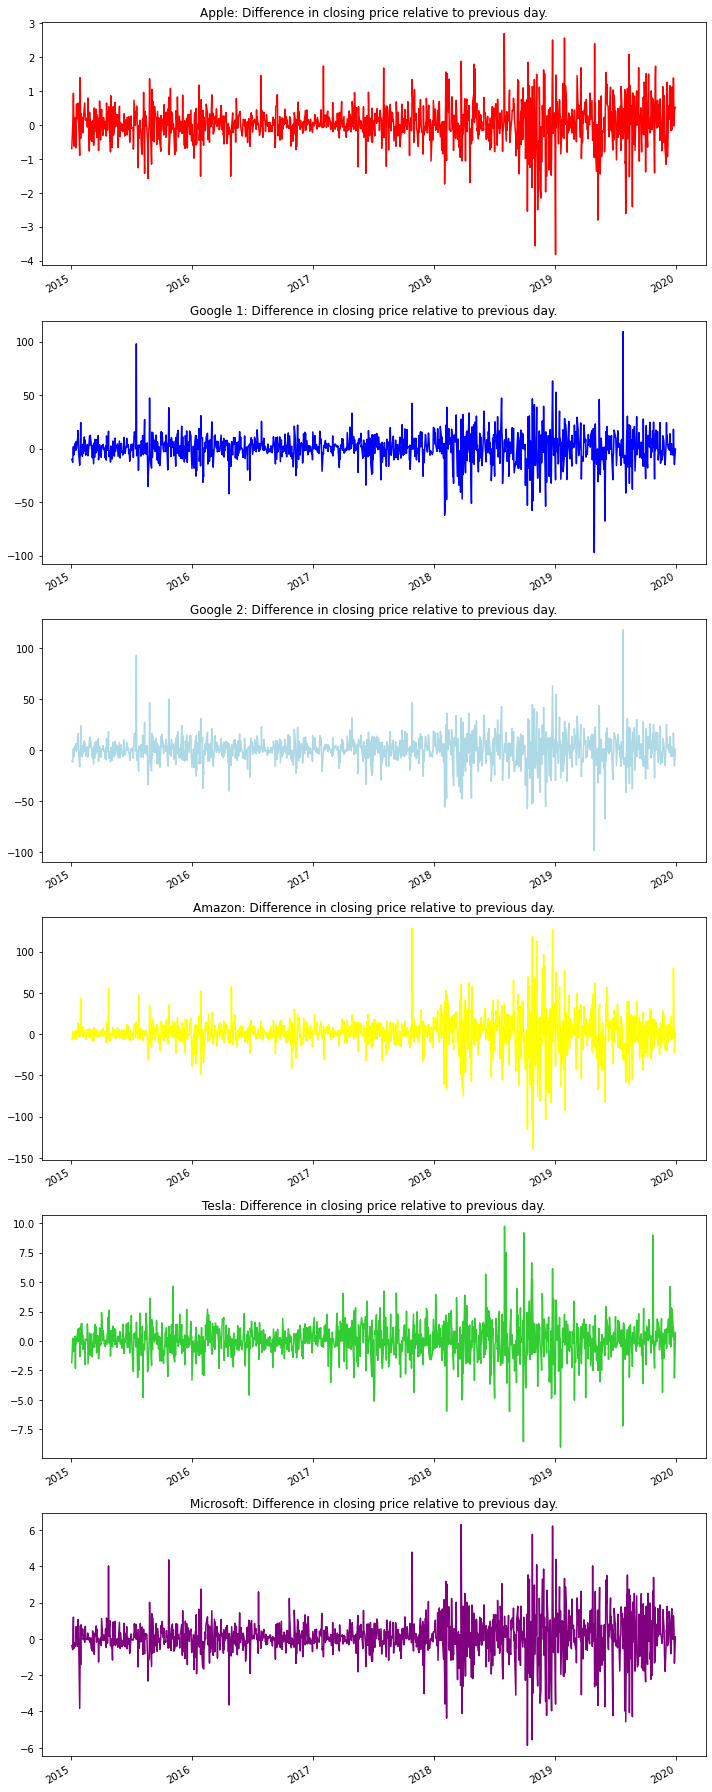

In [ ]:
import matplotlib.pyplot  as plt

fig, ax = plt.subplots(6,1, figsize= (10,25))

apple_diff= (applehist.Close.shift(-1) - applehist.Close)
goog1_diff= (googlehist1.Close.shift(-1) - googlehist1.Close)
goog2_diff= (googlehist2.Close.shift(-1) - googlehist2.Close)
amazon_diff= (amazonhist.Close.shift(-1) - amazonhist.Close)
tesla_diff= (tslahist.Close.shift(-1) - tslahist.Close)
micro_diff= (microhist.Close.shift(-1) - microhist.Close)

apple_diff.iloc[:-1].plot(title="Apple: Difference in closing price relative to previous day.", c="red", ax =ax[0])
goog1_diff.iloc[:-1].plot(title="Google 1: Difference in closing price relative to previous day.", c="blue", ax =ax[1])
goog2_diff.iloc[:-1].plot(title="Google 2: Difference in closing price relative to previous day.", c="lightblue", ax =ax[2])
amazon_diff.iloc[:-1].plot(title="Amazon: Difference in closing price relative to previous day.", c="yellow", ax =ax[3])
tesla_diff.iloc[:-1].plot(title="Tesla: Difference in closing price relative to previous day.", c ="limegreen", ax =ax[4])
micro_diff.iloc[:-1].plot(title="Microsoft: Difference in closing price relative to previous day.", c= "purple", ax =ax[5])

for axis in ax:
    axis.set_xlabel(None)

plt.tight_layout()

Curious to see how actually the prices evolve very similarly, if not in unity, at least in terms of scale.

In [ ]:
apple_diff.describe()

count    1257.000000
mean        0.037862
std         0.595576
min        -3.817581
25%        -0.195415
50%         0.026001
75%         0.319298
max         2.701672
Name: Close, dtype: float64

In [ ]:
goog1_diff.describe()

count    1257.000000
mean        0.644264
std        14.038001
min       -97.239990
25%        -5.299988
50%         0.880005
75%         7.530029
max       109.280029
Name: Close, dtype: float64

In [ ]:
goog2_diff.describe()

count    1257.000000
mean        0.647293
std        13.977859
min       -99.099976
25%        -5.390015
50%         0.630005
75%         7.339966
max       118.290039
Name: Close, dtype: float64

In [ ]:
amazon_diff.describe()

count    1257.000000
mean        1.224598
std        21.826344
min      -139.359985
25%        -5.909973
50%         1.190002
75%         9.780029
max       128.519958
Name: Close, dtype: float64

In [ ]:
tesla_diff.describe()

count    1257.000000
mean        0.031666
std         1.565104
min        -9.009998
25%        -0.682003
50%         0.021999
75%         0.838001
max         9.739998
Name: Close, dtype: float64

In [ ]:
micro_diff.describe()

count    1257.000000
mean        0.090339
std         1.158676
min        -5.873283
25%        -0.352371
50%         0.055405
75%         0.592415
max         6.303032
Name: Close, dtype: float64

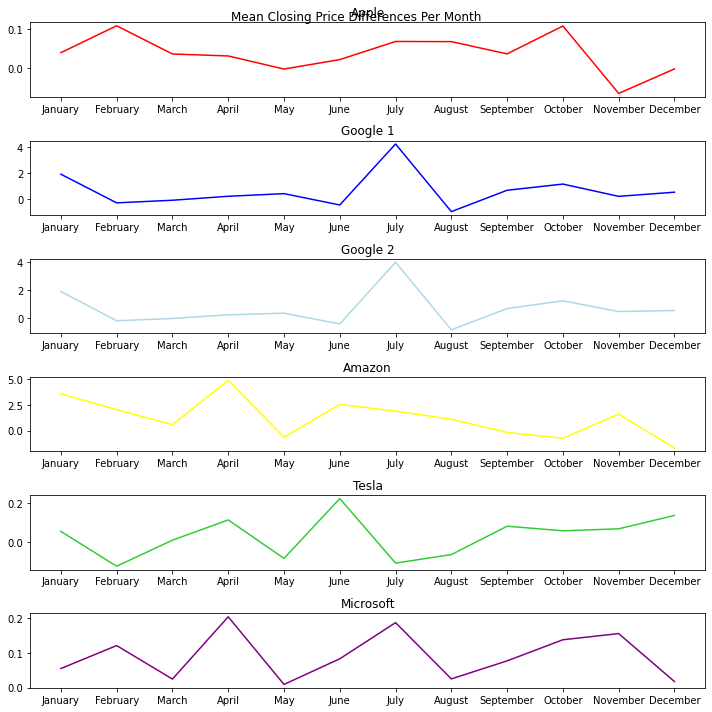

In [ ]:
fig, ax = plt.subplots(6, 1, figsize=(10,10))

fig.suptitle("Mean Closing Price Differences Per Month")

diff_dfs = [apple_diff, goog1_diff, goog2_diff, amazon_diff, tesla_diff, micro_diff]

names = ["Apple", "Google 1", "Google 2", "Amazon", "Tesla", "Microsoft"]

colours = ["red","blue","lightblue","yellow","limegreen","purple"]

for axis, df, name, c in zip(ax, diff_dfs, names, colours):
    df.groupby(df.index.month).mean().plot(title=f"{name}", ax=axis, c=c)
    axis.set_xlabel(None)
    axis.set_xticks([i for i in range(1,13)])
    axis.set_xticklabels(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

plt.tight_layout()

###Difference catogorized in day

In [ ]:
apple_diff.groupby(apple_diff.index.day_name()).mean().sort_index(False)

Date
Friday       0.055436
Monday       0.044517
Thursday    -0.008277
Tuesday      0.096572
Wednesday    0.001337
Name: Close, dtype: float64

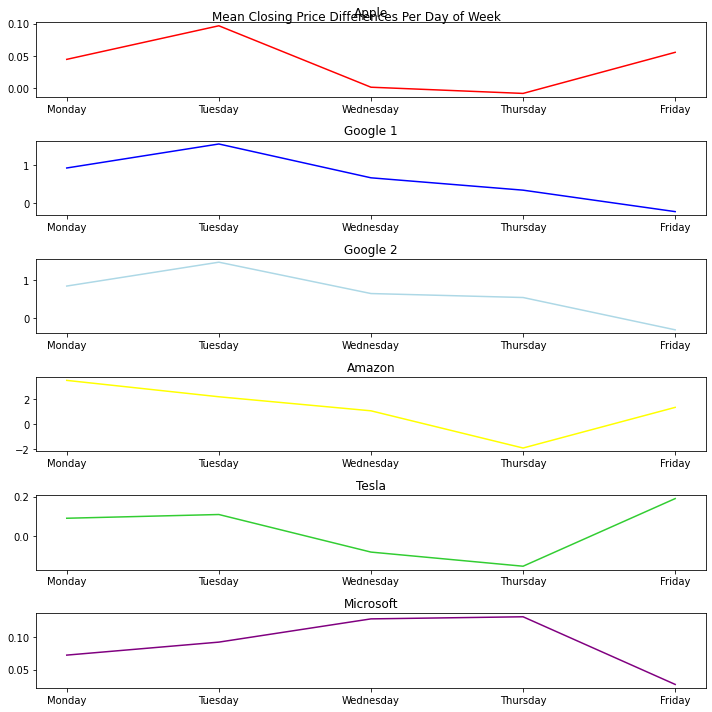

In [ ]:
fig, ax = plt.subplots(6, 1, figsize=(10,10))

fig.suptitle("Mean Closing Price Differences Per Day of Week")

diff_dfs = [apple_diff, goog1_diff, goog2_diff, amazon_diff, tesla_diff, micro_diff]

names = ["Apple", "Google 1", "Google 2", "Amazon", "Tesla", "Microsoft"]

colours = ["red","blue","lightblue","yellow","limegreen","purple"]

for axis, df, name, c in zip(ax, diff_dfs, names, colours):
    df.groupby(df.index.weekday).mean().plot(title=f"{name}", ax=axis, c=c)
    axis.set_xlabel(None)
    axis.set_xticks([0, 1, 2, 3, 4])
    axis.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])

plt.tight_layout()

#Correlation

###Correlation within the features of stocks



In [ ]:
# Scatter and density plots
import numpy as np
import matplotlib.pyplot as plt

def plotScatterMatrix(df, plotSize, textSize, title):

    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    #plot
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    
    #add labels
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)): #add text to only the right upper triangle
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.6, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)

    plt.suptitle(f'Scatter and Density Plot of {title}', fontsize=15)
    plt.show()

def plotCorrelationMatrix(df, graphWidth, title):

    #get correlation matrix
    corr = df.corr()

    #plot graph
    plt.figure(num=None, figsize=(graphWidth, graphWidth))
    corrMat = plt.matshow(corr, fignum = 1)
    
    #set names of x and y ax
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    #set x-ax labels bottom instead of default above
    plt.gca().xaxis.tick_bottom()

    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix of {title}', fontsize=15)
    plt.show()

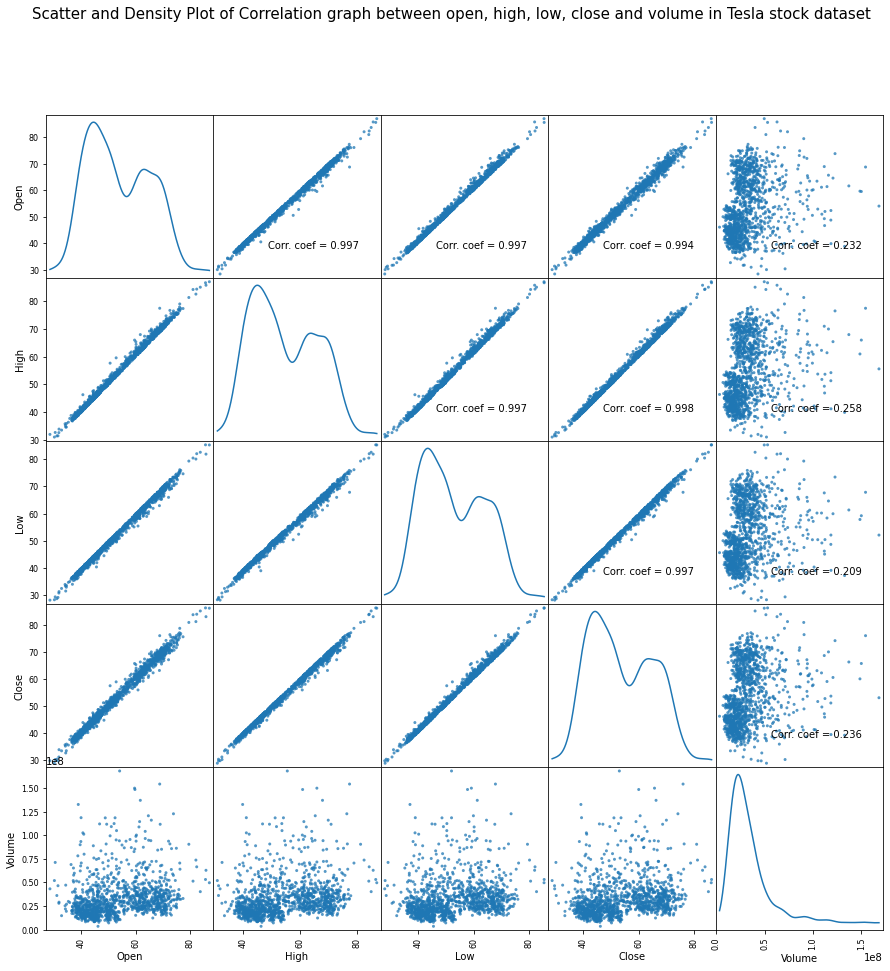

In [ ]:
#leave out columns that erases error
tslahist = tslahist.drop('Stock Splits', 1)
tslahist = tslahist.drop('Dividends', 1)

#correlation graph
plotScatterMatrix(tslahist, 15, 10, 'Correlation graph between open, high, low, close and volume in Tesla stock dataset')

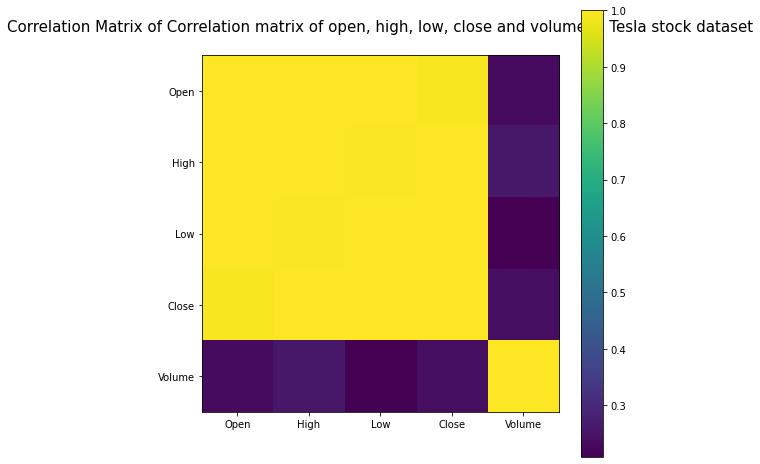

In [ ]:
#correlation matrix
plotCorrelationMatrix(tslahist, 8, 'Correlation matrix of open, high, low, close and volume in Tesla stock dataset')

#set the dataset back
tslahist = tsla.history(start = '2015-01-01', end = '2020-01-01')

##Correlation between sentimental analysis and stock closing price

###Process data

In [24]:
def preprocessdata(stockdata, sentimentdata):
  datetime = []

  for i in range(len(stockdata.index)):
   datetime.append(((stockdata.index[i]).to_pydatetime()).date())

  tweet_score = []

  for i in range(len(sentimentdata.index)):
    if(sentimentdata.index[i] in datetime):
      tweet_score.append(sentimentdata.values[i])

  for j in range(len(stockdata.index)):
    if(datetime[j] not in sentimentdata.index):
      stockdata = stockdata.drop(stockdata.index[j])

  print(len(stockdata['Close']))
  print(len(tweet_score))

  return stockdata, tweet_score, stockdata['Close']

In [25]:
#Preprocess data of Apple
applehist, apple_tweet_score, apple_closingprice = preprocessdata(applehist, apple_df_time_sentiment)

#Check output, should be 1255 or 1252

1255
1255


In [26]:
#Preprocess data of Google 1
googlehist1, google1_tweet_score, google1_closingprice = preprocessdata(googlehist1, google1_df_time_sentiment)

#Check output, should be 1257

1257
1257


In [29]:
#Preprocess data of Google 1
googlehist2, google2_tweet_score, google2_closingprice = preprocessdata(googlehist2, google2_df_time_sentiment)

#Check output, should be 1258

1258
1258


In [27]:
#Preprocess data of Amazon
amazonhist, amazon_tweet_score, amazon_closingprice = preprocessdata(amazonhist, amazon_df_time_sentiment)

#Check output, should be 1258

1258
1258


In [28]:
#Preprocess data of Tesla
tslahist, tesla_tweet_score, tesla_closingprice = preprocessdata(tslahist, tesla_df_time_sentiment)

#Check output, should be 1258

1258
1258


In [30]:
#Preprocess data of Microsoft
microhist, microsoft_tweet_score, microsoft_closingprice = preprocessdata(microhist, msft_df_time_sentiment)

#Check output, should be 1258

1258
1258


### Plot correlation graph

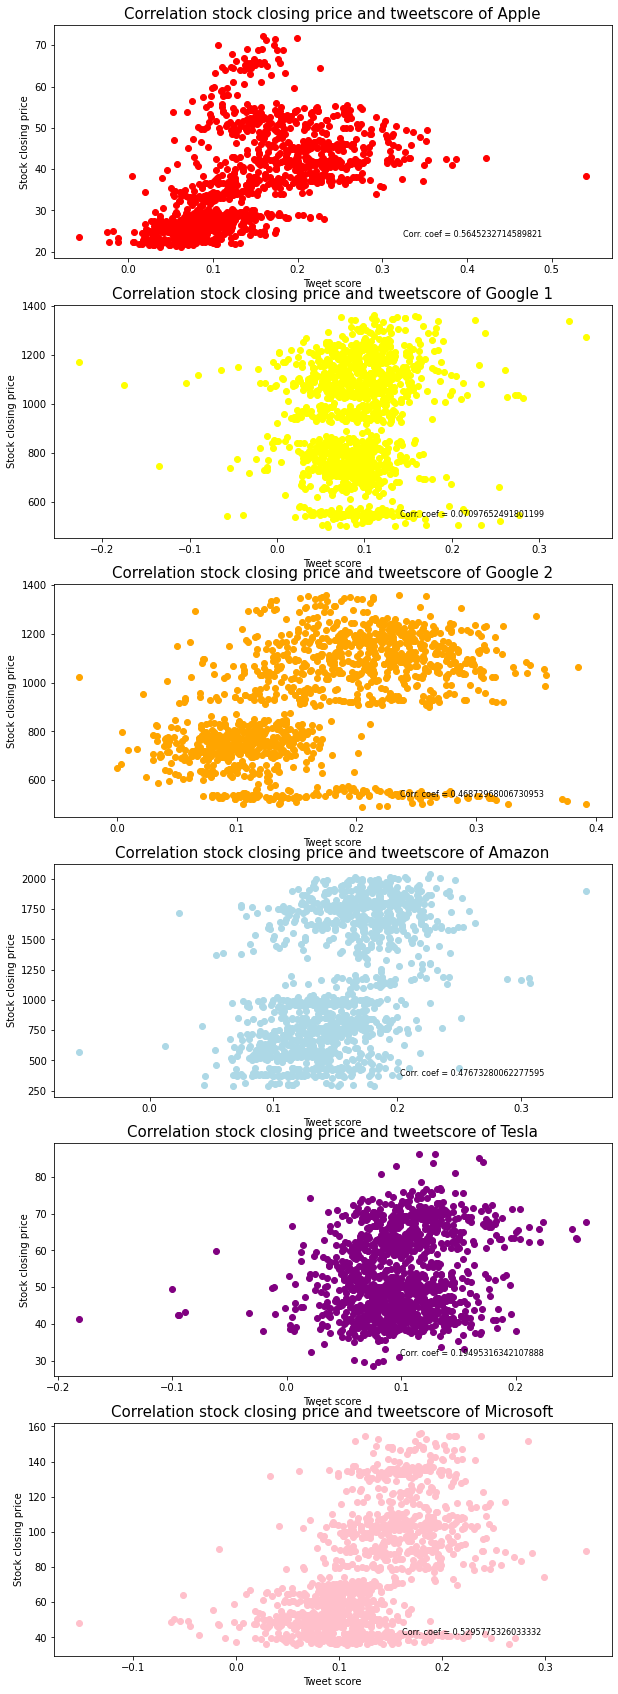

In [ ]:
fig, ax = plt.subplots(6,1, figsize=(10,30))

ax[0].scatter(apple_df.Senti_Mean,apple_df.Close, c="red")
corr_apple = np.corrcoef(apple_df.Senti_Mean,apple_df.Close)[0][1]
ax[0].annotate(f'Corr. coef = {corr_apple}', (0.75, 0.1), xycoords='axes fraction', ha='center', va='center', size=8)
ax[0].set_xlabel('Tweet score')
ax[0].set_ylabel('Stock closing price')
ax[0].set_title('Correlation stock closing price and tweetscore of Apple', fontsize = 15)

ax[1].scatter(google1_df.Senti_Mean,google1_df.Close, c="yellow")
corr_google1 = np.corrcoef(google1_df.Senti_Mean,google1_df.Close)[0][1]
ax[1].annotate(f'Corr. coef = {corr_google1}', (0.75, 0.1), xycoords='axes fraction', ha='center', va='center', size=8)
ax[1].set_xlabel('Tweet score')
ax[1].set_ylabel('Stock closing price')
ax[1].set_title('Correlation stock closing price and tweetscore of Google 1', fontsize = 15)

ax[2].scatter(google2_df.Senti_Mean,google2_df.Close, c="orange")
corr_google2 = np.corrcoef(google2_df.Senti_Mean,google2_df.Close)[0][1]
ax[2].annotate(f'Corr. coef = {corr_google2}', (0.75, 0.1), xycoords='axes fraction', ha='center', va='center', size=8)
ax[2].set_xlabel('Tweet score')
ax[2].set_ylabel('Stock closing price')
ax[2].set_title('Correlation stock closing price and tweetscore of Google 2', fontsize = 15)

ax[3].scatter(amazon_df.Senti_Mean,amazon_df.Close, c="lightblue")
corr_amazon = np.corrcoef(amazon_df.Senti_Mean,amazon_df.Close)[0][1]
ax[3].annotate(f'Corr. coef = {corr_amazon}', (0.75, 0.1), xycoords='axes fraction', ha='center', va='center', size=8)
ax[3].set_xlabel('Tweet score')
ax[3].set_ylabel('Stock closing price')
ax[3].set_title('Correlation stock closing price and tweetscore of Amazon', fontsize = 15)

ax[4].scatter(tsla_df.Senti_Mean,tsla_df.Close, c="purple")
corr_tesla = np.corrcoef(tsla_df.Senti_Mean,tsla_df.Close)[0][1]
ax[4].annotate(f'Corr. coef = {corr_tesla}', (0.75, 0.1), xycoords='axes fraction', ha='center', va='center', size=8)
ax[4].set_xlabel('Tweet score')
ax[4].set_ylabel('Stock closing price')
ax[4].set_title('Correlation stock closing price and tweetscore of Tesla', fontsize = 15)

ax[5].scatter(micro_df.Senti_Mean,micro_df.Close, c="pink")
corr_microsoft = np.corrcoef(micro_df.Senti_Mean,micro_df.Close)[0][1]
ax[5].annotate(f'Corr. coef = {corr_microsoft}', (0.75, 0.1), xycoords='axes fraction', ha='center', va='center', size=8)
ax[5].set_xlabel('Tweet score')
ax[5].set_ylabel('Stock closing price')
ax[5].set_title('Correlation stock closing price and tweetscore of Microsoft', fontsize = 15)

plt.show()

##Merge information of tweets and stocks in one df for machine learning

In [9]:
apple_df = pd.merge(applehist, apple_df_time_sentiment, left_index=True, right_index=True)
apple_df.columns = list(apple_df.columns[:-3]) + ["Senti_Mean", "Senti_Min", "Senti_Max"]
google1_df = pd.merge(googlehist1, google1_df_time_sentiment, left_index=True, right_index=True)
google1_df.columns = list(google1_df.columns[:-3]) + ["Senti_Mean", "Senti_Min", "Senti_Max"]
google2_df = pd.merge(googlehist2, google2_df_time_sentiment, left_index=True, right_index=True)
google2_df.columns = list(google2_df.columns[:-3]) + ["Senti_Mean", "Senti_Min", "Senti_Max"]
amazon_df = pd.merge(amazonhist, amazon_df_time_sentiment, left_index=True, right_index=True)
amazon_df.columns = list(amazon_df.columns[:-3]) + ["Senti_Mean", "Senti_Min", "Senti_Max"]
tsla_df = pd.merge(tslahist, tesla_df_time_sentiment, left_index=True, right_index=True)
tsla_df.columns = list(tsla_df.columns[:-3]) + ["Senti_Mean", "Senti_Min", "Senti_Max"]
micro_df = pd.merge(microhist, msft_df_time_sentiment, left_index=True, right_index=True)
micro_df.columns = list(micro_df.columns[:-3]) + ["Senti_Mean", "Senti_Min", "Senti_Max"]

C:\Users\sunny\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [32]:
apple_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Senti_Mean,Senti_Min,Senti_Max
2015-01-02,25.212261,25.223579,24.297838,24.745996,212818400,0.0000,0,0.086860,-0.9032,0.9136
2015-01-05,24.510601,24.592084,23.858736,24.048862,257142000,0.0000,0,0.143393,-0.8957,0.9491
2015-01-06,24.114502,24.315946,23.682188,24.051126,263188400,0.0000,0,0.161076,-0.8720,0.9244
2015-01-07,24.263891,24.490233,24.150720,24.388380,160423600,0.0000,0,0.155337,-0.8341,0.9264
2015-01-08,24.723359,25.384277,24.603396,25.325428,237458000,0.0000,0,0.174654,-0.8367,0.9216
2015-01-09,25.501979,25.633258,24.945178,25.352594,214798000,0.0000,0,0.145294,-0.8678,0.9380
2015-01-12,25.486132,25.492922,24.626033,24.727886,198603200,0.0000,0,0.155110,-0.8316,0.8718
2015-01-13,25.221313,25.531403,24.650931,24.947439,268367600,0.0000,0,0.160728,-0.7650,0.9100
2015-01-14,24.680356,25.008552,24.558131,24.852377,195826400,0.0000,0,0.103770,-0.9118,0.9201
2015-01-15,24.897640,24.911220,24.141658,24.177872,240056000,0.0000,0,0.069464,-0.9161,0.9451


In [10]:
def add_growth(df):
  growth_array = [1]
  close_array = df['Close'].to_numpy() 

  for i in range(len(close_array) - 1):
    growth = (close_array[i+1]-close_array[i])/close_array[i]
    growth_array.append(growth)
  df['Growth'] = growth_array

  result_df = df.loc[:, ['Close', 'Senti_Mean', 'Senti_Min', 'Senti_Max', 'Growth']]
  result_df = result_df.iloc[1:,:]
  return result_df

In [11]:
apple_model_df = add_growth(apple_df)
google1_model_df = add_growth(google1_df)
google2_model_df = add_growth(google2_df)
amazon_model_df = add_growth(amazon_df)
tsla_model_df = add_growth(tsla_df)
micro_model_df = add_growth(micro_df)

In [13]:
apple_model_df

,Close,Senti_Mean,Senti_Min,Senti_Max,Growth
2015-01-05,24.048857,0.143393,-0.8957,0.9491,-0.028172
2015-01-06,24.051128,0.161076,-0.8720,0.9244,0.000094
2015-01-07,24.388376,0.155337,-0.8341,0.9264,0.014022
2015-01-08,25.325430,0.174654,-0.8367,0.9216,0.038422
2015-01-09,25.352592,0.145294,-0.8678,0.9380,0.001073
2015-01-12,24.727884,0.155110,-0.8316,0.8718,-0.024641
2015-01-13,24.947441,0.160728,-0.7650,0.9100,0.008879
2015-01-14,24.852379,0.103770,-0.9118,0.9201,-0.003811
2015-01-15,24.177879,0.069464,-0.9161,0.9451,-0.027140
2015-01-16,23.990013,0.067803,-0.8994,0.9578,-0.007770


##Building model

###Preprocess training and test set

In [12]:
from sklearn.preprocessing import MinMaxScaler

def split_test_train(df):
  #scaler=MinMaxScaler(feature_range=(0,1))
  #df_close_values=scaler.fit_transform(np.array(df['Close']).reshape(-1,1))
  #df_close_values = np.array(df_close_values).reshape(-1,1)
  df_growth_values = np.array(df['Growth']).reshape(-1,1)
  ##splitting dataset into train and test split
  training_size=int(len(df_growth_values)*0.80)
  test_size=len(df_growth_values)-training_size
  #make train and test data
  train_data = df_growth_values[0:training_size]
  test_data = df_growth_values[training_size:len(df_growth_values)]
  return train_data, test_data

def split_test_train_with_senti_features(df):
  #scaler=MinMaxScaler(feature_range=(0,1))
  #df_close_values= scaler.fit_transform(np.array(df['Close']).reshape(-1,1))
  #df_close_values = np.array(df_close_values).reshape(-1,1)
  df_growth_values = np.array(df['Growth']).reshape(-1,1)
  df_senti_mean_values = np.array(df['Senti_Mean']).reshape(-1,1)
  df_senti_max_values = np.array(df['Senti_Max']).reshape(-1,1)
  df_senti_min_values = np.array(df['Senti_Min']).reshape(-1,1)
  ##splitting dataset into train and test split
  training_size=int(len(df_growth_values)*0.80)
  test_size=len(df_growth_values)-training_size
  #make train and test data
  train_data = np.column_stack((df_growth_values[0:training_size], df_senti_mean_values[0:training_size],df_senti_max_values[0:training_size],df_senti_min_values[0:training_size]))
  test_data = np.column_stack((df_growth_values[training_size:len(df_growth_values)], df_senti_mean_values[training_size:len(df_growth_values)],df_senti_max_values[training_size:len(df_growth_values)],df_senti_min_values[training_size:len(df_growth_values)]))
  return train_data, test_data

In [13]:
import numpy as np

#For model 1
apple_train_df_1, apple_test_df_1 = split_test_train(apple_model_df)
google1_train_df_1, google1_test_df_1 = split_test_train(google1_model_df)
google2_train_df_1, google2_test_df_1 = split_test_train(google2_model_df)
amazon_train_df_1, amazon_test_df_1 = split_test_train(amazon_model_df)
tsla_train_df_1, tsla_test_df_1 = split_test_train(tsla_model_df)
micro_train_df_1, micro_test_df_1 = split_test_train(micro_model_df)
#For model 2
apple_train_df_2, apple_test_df_2 = split_test_train_with_senti_features(apple_model_df)
google1_train_df_2, google1_test_df_2 = split_test_train_with_senti_features(google1_model_df)
google2_train_df_2, google2_test_df_2 = split_test_train_with_senti_features(google2_model_df)
amazon_train_df_2, amazon_test_df_2 = split_test_train_with_senti_features(amazon_model_df)
tsla_train_df_2, tsla_test_df_2 = split_test_train_with_senti_features(tsla_model_df)
micro_train_df_2, micro_test_df_2 = split_test_train_with_senti_features(micro_model_df)

In [15]:
apple_train_df_1.shape

(1003, 1)

In [16]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step)]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		#get the next scaled closing price
		dataY.append(dataset[i + time_step][0])
	return np.array(dataX), np.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100 ## HOW MANY FEATURES?
#For model 1
apple_X_train1, apple_y_train1 = create_dataset(apple_train_df_1, time_step)
apple_X_test1, apple_y_test1 = create_dataset(apple_test_df_1, time_step)
google1_X_train1, google1_y_train1 = create_dataset(google1_train_df_1, time_step)
google1_X_test1, google1_y_test1 = create_dataset(google1_test_df_1, time_step)
google2_X_train1, google2_y_train1 = create_dataset(google2_train_df_1, time_step)
google2_X_test1, google2_y_test1 = create_dataset(google2_test_df_1, time_step)
amazon_X_train1, amazon_y_train1 = create_dataset(amazon_train_df_1, time_step)
amazon_X_test1, amazon_y_test1 = create_dataset(amazon_test_df_1, time_step)
tsla_X_train1, tsla_y_train1 = create_dataset(tsla_train_df_1, time_step)
tsla_X_test1, tsla_y_test1 = create_dataset(tsla_test_df_1, time_step)
micro_X_train1, micro_y_train1 = create_dataset(micro_train_df_1, time_step)
micro_X_test1, micro_y_test1 = create_dataset(micro_test_df_1, time_step)
#For model 2
apple_X_train2, apple_y_train2 = create_dataset(apple_train_df_2, time_step)
apple_X_test2, apple_y_test2 = create_dataset(apple_test_df_2, time_step)
google1_X_train2, google1_y_train2 = create_dataset(google1_train_df_2, time_step)
google1_X_test2, google1_y_test2 = create_dataset(google1_test_df_2, time_step)
google2_X_train2, google2_y_train2 = create_dataset(google2_train_df_2, time_step)
google2_X_test2, google2_y_test2 = create_dataset(google2_test_df_2, time_step)
amazon_X_train2, amazon_y_train2 = create_dataset(amazon_train_df_2, time_step)
amazon_X_test2, amazon_y_test2 = create_dataset(amazon_test_df_2, time_step)
tsla_X_train2, tsla_y_train2 = create_dataset(tsla_train_df_2, time_step)
tsla_X_test2, tsla_y_test2 = create_dataset(tsla_test_df_2, time_step)
micro_X_train2, micro_y_train2 = create_dataset(micro_train_df_2, time_step)
micro_X_test2, micro_y_test2 = create_dataset(micro_test_df_2, time_step)

In [18]:
#Model 1
print('Apple data shapes: ', apple_X_train1.shape, apple_y_train1.shape, apple_X_test1.shape, apple_y_test1.shape)
print('Google 1 data shapes: ', google1_X_train1.shape, google1_y_train1.shape, google1_X_train1.shape, google1_y_test1.shape)
print('Google 2 data shapes: ', google2_X_train1.shape, google2_y_train1.shape, google2_X_train1.shape, google2_y_test1.shape)
print('Amazon data shapes: ', amazon_X_train1.shape, amazon_y_train1.shape, amazon_X_train1.shape, amazon_y_test1.shape)
print('Tesla data shapes: ', tsla_X_train1.shape, tsla_y_train1.shape, tsla_X_test1.shape, tsla_y_test1.shape)
print('Microsoft 1 data shapes: ', micro_X_train1.shape, micro_y_train1.shape, micro_X_train1.shape, micro_y_test1.shape)

Apple data shapes:  (902, 100, 1) (902,) (150, 100, 1) (150,)
Google 1 data shapes:  (903, 100, 1) (903,) (903, 100, 1) (151,)
Google 2 data shapes:  (904, 100, 1) (904,) (904, 100, 1) (151,)
Amazon data shapes:  (904, 100, 1) (904,) (904, 100, 1) (151,)
Tesla data shapes:  (904, 100, 1) (904,) (151, 100, 1) (151,)
Microsoft 1 data shapes:  (904, 100, 1) (904,) (904, 100, 1) (151,)


In [19]:
#Model 1
#Merge all training sets into one

#training
submergeX11 = np.append(apple_X_train1, google1_X_train1,  axis = 0)
submergeX12 = np.append(google2_X_train1, amazon_X_train1, axis = 0)
submergeX13 = np.append(tsla_X_train1, micro_X_train1, axis = 0)
submergeX14 = np.append(submergeX11, submergeX12, axis = 0)
Merged_X_train1 = np.append(submergeX13, submergeX14, axis = 0)
print("Merged Xtrain1 shape: ", Merged_X_train1.shape)


submergeY11 = np.append(apple_y_train1, google1_y_train1,  axis = 0)
submergeY12 = np.append(google2_y_train1, amazon_y_train1, axis = 0)
submergeY13 = np.append(tsla_y_train1, micro_y_train1, axis = 0)
submergeY14 = np.append(submergeY11, submergeY12, axis = 0)
Merged_y_train1 = np.append(submergeY13, submergeY14, axis = 0)
print("Merged ytrain1 shape: ", Merged_y_train1.shape)

#test
submergeX1a = np.append(apple_X_test1, google1_X_test1,  axis = 0)
submergeX1b = np.append(google2_X_test1, amazon_X_test1, axis = 0)
submergeX1c = np.append(tsla_X_test1, micro_X_test1, axis = 0)
submergeX1d = np.append(submergeX1a, submergeX1b, axis = 0)
Merged_X_test1 = np.append(submergeX1d, submergeX1c, axis = 0)
print("Merged Xtest1 shape: ", Merged_X_test1.shape)


submergeY1a = np.append(apple_y_test1, google1_y_test1,  axis = 0)
submergeY1b = np.append(google2_y_test1, amazon_y_test1, axis = 0)
submergeY1c = np.append(tsla_y_test1, micro_y_test1, axis = 0)
submergeY1d = np.append(submergeY1a, submergeY1b, axis = 0)
Merged_y_test1 = np.append(submergeY1c, submergeY1d, axis = 0)
print("Merged yest1 shape: ", Merged_y_test1.shape)


Merged Xtrain1 shape:  (5421, 100, 1)
Merged ytrain1 shape:  (5421,)
Merged Xtest1 shape:  (905, 100, 1)
Merged yest1 shape:  (905,)


In [20]:
#Model 2
print('Apple data shapes: ', apple_X_train2.shape, apple_y_train2.shape, apple_X_test2.shape, apple_y_test2.shape)
print('Google 1 data shapes: ', google1_X_train2.shape, google1_y_train2.shape, google1_X_train2.shape, google1_y_test2.shape)
print('Google 2 data shapes: ', google2_X_train2.shape, google2_y_train2.shape, google2_X_train2.shape, google2_y_test2.shape)
print('Amazon data shapes: ', amazon_X_train2.shape, amazon_y_train2.shape, amazon_X_train2.shape, amazon_y_test2.shape)
print('Tesla data shapes: ', tsla_X_train2.shape, tsla_y_train2.shape, tsla_X_test2.shape, tsla_y_test2.shape)
print('Microsoft 1 data shapes: ', micro_X_train2.shape, micro_y_train2.shape, micro_X_train2.shape, micro_y_test2.shape)

Apple data shapes:  (902, 100, 4) (902,) (150, 100, 4) (150,)
Google 1 data shapes:  (903, 100, 4) (903,) (903, 100, 4) (151,)
Google 2 data shapes:  (904, 100, 4) (904,) (904, 100, 4) (151,)
Amazon data shapes:  (904, 100, 4) (904,) (904, 100, 4) (151,)
Tesla data shapes:  (904, 100, 4) (904,) (151, 100, 4) (151,)
Microsoft 1 data shapes:  (904, 100, 4) (904,) (904, 100, 4) (151,)


In [21]:
#Model 2
#Merge all training sets into one

#training
submergeX21 = np.append(apple_X_train2, google1_X_train2,  axis = 0)
submergeX22 = np.append(google2_X_train2, amazon_X_train2, axis = 0)
submergeX23 = np.append(tsla_X_train2, micro_X_train2, axis = 0)
submergeX24 = np.append(submergeX21, submergeX22, axis = 0)
Merged_X_train2 = np.append(submergeX23, submergeX24, axis = 0)
print("Merged Xtrain2 shape: ", Merged_X_train2.shape)


submergeY21 = np.append(apple_y_train2, google1_y_train2,  axis = 0)
submergeY22 = np.append(google2_y_train2, amazon_y_train2, axis = 0)
submergeY23 = np.append(tsla_y_train2, micro_y_train2, axis = 0)
submergeY24 = np.append(submergeY21, submergeY22, axis = 0)
Merged_y_train2 = np.append(submergeY23, submergeY24, axis = 0)
print("Merged ytrain2 shape: ", Merged_y_train2.shape)

#test
submergeX2a = np.append(apple_X_test2, google1_X_test2,  axis = 0)
submergeX2b = np.append(google2_X_test2, amazon_X_test2, axis = 0)
submergeX2c = np.append(tsla_X_test2, micro_X_test2, axis = 0)
submergeX2d = np.append(submergeX2a, submergeX2b, axis = 0)
Merged_X_test2 = np.append(submergeX2d, submergeX2c, axis = 0)
print("Merged Xtest2 shape: ", Merged_X_test2.shape)


submergeY2a = np.append(apple_y_test2, google1_y_test2,  axis = 0)
submergeY2b = np.append(google2_y_test2, amazon_y_test2, axis = 0)
submergeY2c = np.append(tsla_y_test2, micro_y_test2, axis = 0)
submergeY2d = np.append(submergeY2a, submergeY2b, axis = 0)
Merged_y_test2 = np.append(submergeY2c, submergeY2d, axis = 0)
print("Merged yest2 shape: ", Merged_y_test2.shape)

Merged Xtrain2 shape:  (5421, 100, 4)
Merged ytrain2 shape:  (5421,)
Merged Xtest2 shape:  (905, 100, 4)
Merged yest2 shape:  (905,)


###Summary of training and test sets

Model dataframes

1.   apple_model_df 
2.   google1_model_df
3.   google2_model_df
4.   amazon_model_df 
5.   tsla_model_df  
6.   micro_model_df

Model 1 Training sets, X and y
1.   apple_X_train1, apple_y_train1
2.   google1_X_train1, google1_y_train1
3.   google2_X_train1, google2_y_train1
4.   amazon_X_train1, amazon_y_train1
5.   tsla_X_train1, tsla_y_train1
6.   micro_X_train1, micro_y_train1
7.   Merged_X_train1, Merged_y_train1

Model 1 Test sets, X and y
1.   apple_X_test1, apple_y_test1
2.   google1_X_test1, google1_y_test1
3.   google2_X_test1, google2_y_test1
4.   amazon_X_test1, amazon_y_test1
5.   tsla_X_test1, tsla_y_test1
6.   micro_X_test1, micro_y_test1
7.   Merged_X_test1, Merged_y_test1

Model 2 Training sets, X and y

1.   apple_X_train2, apple_y_train2
2.   google1_X_train2, google1_y_train2
3.   google2_X_train2, google2_y_train2
4.   amazon_X_train2, amazon_y_train2
5.   tsla_X_train2, tsla_y_train2 
6.   micro_X_train2, micro_y_train2
7.   Merged_X_train2, Merged_y_train2

Model 2 Test sets, X and y
1.   apple_X_test2, apple_y_test2
2.   google1_X_test2, google1_y_test2
3.   google2_X_test2, google2_y_test2
4.   amazon_X_test2, amazon_y_test2
5.   tsla_X_test2, tsla_y_test2
6.   micro_X_test2, micro_y_test2
7.   Merged_X_test2, Merged_y_test2


###LSTM Model using just growth feature





In [24]:
### Create the Stacked LSTM apple model 1
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Flatten
#from keras_self_attention import SeqSelfAttention

model_apple=Sequential()
model_apple.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model_apple.add(LSTM(50,return_sequences=True))
# model.add(SeqSelfAttention(attention_width=15, attention_activation='sigmoid',
# name='Attention'))
# model.add(Flatten())
model_apple.add(LSTM(50))
model_apple.add(Dense(1))
model_apple.compile(loss='mean_squared_error',optimizer='adam')
model_apple.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_apple.fit(apple_X_train1,apple_y_train1,validation_data=(apple_X_test1,apple_y_test1),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
15/15 [==============================] - 17s 414ms/step - loss: 2.5710e-04 - val_loss: 2.0373e-04
Epoch 2/10
15/15 [==============================] - 3s 171ms/step - loss: 2.3686e-04 - val_loss: 2.0098e-04
Epoch 3/10
15/15 [==============================] - 2s 153ms/step - loss: 2.4628e-04 - val_loss: 2.0609e-04
Epoch 4/10
15/15 [==============================] - 2s 154ms/step - loss: 2.4227e-04 - val_loss: 2.2019e-04
Epoch 5/10
15/15 [==============================] - 2s 153ms/step - loss: 2.4762e-04 - val_loss: 2.0910e-04
Epoch 6/10
15/15 [==============================] - 2s 156ms/step - loss: 2.4546e-04 - val_loss: 2.1103e-04
Epoch 7/10
15/15 [==============================] - 3s 190ms/step - loss: 2.4891e-04 - val_loss: 2.4097e-04
Epoch 8/10
15/15 [==============================] - 3s 187ms/step - loss: 2.4695e-04 - val_loss: 2.1467e-04
Epoch 9/10
15/15 [==============================] - 3s 180ms/step - loss: 2.3735e-04 - val_loss: 2.0244e-04
Epoch 10/10
15/15 [========

In [46]:
from tensorflow.keras.layers import Bidirectional, Dense
from tensorflow.keras.models import Sequential

model_BiLSTM = Sequential()
model_BiLSTM.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(100,1))))
model_BiLSTM.add(Bidirectional(LSTM(50,return_sequences=True)))
model_BiLSTM.add(Bidirectional(LSTM(50)))
model_BiLSTM.add(Dense(1))
model_BiLSTM.compile(loss='mean_squared_error',optimizer='adam')

In [48]:
model_BiLSTM.fit(Merged_X_train1,Merged_y_train1,validation_data=(Merged_X_test1,Merged_y_test1),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
85/85 [==============================] - 102s 426ms/step - loss: 3.6393e-04 - val_loss: 3.0987e-04
Epoch 2/10
85/85 [==============================] - 27s 315ms/step - loss: 3.4792e-04 - val_loss: 3.1212e-04
Epoch 3/10
85/85 [==============================] - 29s 340ms/step - loss: 3.4695e-04 - val_loss: 3.2231e-04
Epoch 4/10
85/85 [==============================] - 27s 321ms/step - loss: 3.4866e-04 - val_loss: 3.2893e-04
Epoch 5/10
85/85 [==============================] - 27s 317ms/step - loss: 3.4902e-04 - val_loss: 3.5292e-04
Epoch 6/10
85/85 [==============================] - 27s 311ms/step - loss: 3.4533e-04 - val_loss: 3.1167e-04
Epoch 7/10
85/85 [==============================] - 30s 346ms/step - loss: 3.4518e-04 - val_loss: 3.1176e-04
Epoch 8/10
85/85 [==============================] - 28s 330ms/step - loss: 3.4483e-04 - val_loss: 3.1066e-04
Epoch 9/10
85/85 [==============================] - 27s 316ms/step - loss: 3.4468e-04 - val_loss: 3.2433e-04
Epoch 10/10
85/85 

In [26]:
### Create the Stacked LSTM model 1
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Flatten
#from keras_self_attention import SeqSelfAttention

model1=Sequential()
model1.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model1.add(LSTM(50,return_sequences=True))
# model.add(SeqSelfAttention(attention_width=15, attention_activation='sigmoid',
# name='Attention'))
# model.add(Flatten())
model1.add(LSTM(50))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model1.fit(Merged_X_train1,Merged_y_train1,validation_data=(Merged_X_test1,Merged_y_test1),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
85/85 [==============================] - 29s 246ms/step - loss: 3.5761e-04 - val_loss: 3.0981e-04
Epoch 2/10
85/85 [==============================] - 19s 220ms/step - loss: 3.4816e-04 - val_loss: 3.1660e-04
Epoch 3/10
85/85 [==============================] - 20s 229ms/step - loss: 3.4543e-04 - val_loss: 3.1165e-04
Epoch 4/10
85/85 [==============================] - 20s 231ms/step - loss: 3.4664e-04 - val_loss: 3.1052e-04
Epoch 5/10
85/85 [==============================] - 16s 186ms/step - loss: 3.4651e-04 - val_loss: 3.0987e-04
Epoch 6/10
85/85 [==============================] - 15s 176ms/step - loss: 3.4681e-04 - val_loss: 3.1774e-04
Epoch 7/10
85/85 [==============================] - 15s 175ms/step - loss: 3.4624e-04 - val_loss: 3.1502e-04
Epoch 8/10
85/85 [==============================] - 14s 164ms/step - loss: 3.4983e-04 - val_loss: 3.1655e-04
Epoch 9/10
85/85 [==============================] - 14s 163ms/step - loss: 3.4480e-04 - val_loss: 3.1359e-04
Epoch 10/10
85/85 [

###LSTM Model using growth and sentimental feature

In [28]:
### Create the Stacked LSTM model 2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Flatten
#from keras_self_attention import SeqSelfAttention

model2=Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(100,4)))
model2.add(LSTM(50,return_sequences=True))
# model.add(SeqSelfAttention(attention_width=15, attention_activation='sigmoid',
# name='Attention'))
# model.add(Flatten())
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           11000     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 51,451
Trainable params: 51,451
Non-trainable params: 0
_________________________________________________________________


In [29]:
model2.fit(Merged_X_train2,Merged_y_train2,validation_data=(Merged_X_test2,Merged_y_test2),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
85/85 [==============================] - 22s 177ms/step - loss: 7.0598e-04 - val_loss: 3.2282e-04
Epoch 2/10
85/85 [==============================] - 13s 156ms/step - loss: 3.4724e-04 - val_loss: 3.1018e-04
Epoch 3/10
85/85 [==============================] - 13s 158ms/step - loss: 3.5474e-04 - val_loss: 3.1010e-04
Epoch 4/10
85/85 [==============================] - 13s 155ms/step - loss: 3.4861e-04 - val_loss: 3.1389e-04
Epoch 5/10
85/85 [==============================] - 13s 156ms/step - loss: 3.5215e-04 - val_loss: 3.1120e-04
Epoch 6/10
85/85 [==============================] - 13s 155ms/step - loss: 3.5998e-04 - val_loss: 3.1523e-04
Epoch 7/10
85/85 [==============================] - 13s 156ms/step - loss: 3.5635e-04 - val_loss: 3.1885e-04
Epoch 8/10
85/85 [==============================] - 13s 156ms/step - loss: 3.5225e-04 - val_loss: 3.3214e-04
Epoch 9/10
85/85 [==============================] - 13s 158ms/step - loss: 3.5246e-04 - val_loss: 3.1119e-04
Epoch 10/10
85/85 [

###Prediction

Compare R2 score and RMSE of two models

In [30]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#r2 score, because continuos values and RMSE

#model 1
test_predict_model1 =model1.predict(Merged_X_test1)
r2score_1 = r2_score(Merged_y_test1, test_predict_model1)
RMSE_1 = mean_squared_error(Merged_y_test1, test_predict_model1)
print(f"The R-score of model 1 is: {r2score_1}") 
print(f"The RMSE of model 1 is: {RMSE_1}") 

#model 2 (with tweet features)
test_predict_model2 =model2.predict(Merged_X_test2)
r2score_2 = r2_score(Merged_y_test2, test_predict_model2)
RMSE_2 = mean_squared_error(Merged_y_test2, test_predict_model2)
print(f"The R-score of model 2 is: {r2score_2}") 
print(f"The RMSE of model 2 is: {RMSE_2}") 

The R-score of model 1 is: -0.022358258558530908
The RMSE of model 1 is: 0.0003162542927733629
The R-score of model 2 is: -0.003975340256874738
The RMSE of model 2 is: 0.00031056775698423775


Plot the graphs to visualize how the models predict it



Model dataframes

1.   apple_model_df 
2.   google1_model_df
3.   google2_model_df
4.   amazon_model_df 
5.   tsla_model_df  
6.   micro_model_df

Model 1 Training sets, X and y
1.   apple_X_train1, apple_y_train1
2.   google1_X_train1, google1_y_train1
3.   google2_X_train1, google2_y_train1
4.   amazon_X_train1, amazon_y_train1
5.   tsla_X_train1, tsla_y_train1
6.   micro_X_train1, micro_y_train1
7.   Merged_X_train1, Merged_y_train1

Model 1 Test sets, X and y
1.   apple_X_test1, apple_y_test1
2.   google1_X_test1, google1_y_test1
3.   google2_X_test1, google2_y_test1
4.   amazon_X_test1, amazon_y_test1
5.   tsla_X_test1, tsla_y_test1
6.   micro_X_test1, micro_y_test1
7.   Merged_X_test1, Merged_y_test1

Model 2 Training sets, X and y

1.   apple_X_train2, apple_y_train2
2.   google1_X_train2, google1_y_train2
3.   google2_X_train2, google2_y_train2
4.   amazon_X_train2, amazon_y_train2
5.   tsla_X_train2, tsla_y_train2 
6.   micro_X_train2, micro_y_train2
7.   Merged_X_train2, Merged_y_train2

Model 2 Test sets, X and y
1.   apple_X_test2, apple_y_test2
2.   google1_X_test2, google1_y_test2
3.   google2_X_test2, google2_y_test2
4.   amazon_X_test2, amazon_y_test2
5.   tsla_X_test2, tsla_y_test2
6.   micro_X_test2, micro_y_test2
7.   Merged_X_test2, Merged_y_test2

In [31]:
import math

def get_closing_predictions_of_models(model_df, Xtrain1, Xtest1, Xtrain2, Xtest2, timestep):
    train_predict1= model1.predict(Xtrain1)
    test_predict1 = model1.predict(Xtest1)
    
    emptysteps = timestep

    pred_growth = np.empty(len(model_df))
    pred_growth[:] = np.NaN
    pred_growth.reshape(-1, 1)

    pred_growth[emptysteps:(emptysteps+len(train_predict1))] = train_predict1.ravel()
    pred_growth[(2*emptysteps+len(train_predict1)):(2*emptysteps+len(train_predict1)+len(test_predict1))] = test_predict1.ravel()

    model_df['Predicted growth by m1'] = pred_growth
    
    predicted_close = []
    for i in range(len(model_df)):
        if i == 0:
            predicted_close.append(model_df['Close'][i])
        else:
            if (math.isnan(model_df['Predicted growth by m1'][i])):
                predicted_close.append(np.nan)
            else:
                predicted_close.append((1+model_df['Predicted growth by m1'][i])*model_df['Close'][i-1])
                
    model_df['Predicted close by m1'] = predicted_close

    train_predict2= model2.predict(Xtrain2)
    test_predict2 = model2.predict(Xtest2)
    
    pred_growth2 = np.empty(len(model_df))
    pred_growth2[:] = np.NaN
    pred_growth2.reshape(-1, 1)

    pred_growth2[emptysteps:(emptysteps+len(train_predict2))] = train_predict2.ravel()
    pred_growth2[(2*emptysteps+len(train_predict2)):(2*emptysteps+len(train_predict2)+len(test_predict2))] = test_predict2.ravel()

    model_df['Predicted growth by m2'] = pred_growth2
    
    predicted_close2 = []
    for i in range(len(model_df)):
        if i == 0:
            predicted_close2.append(model_df['Close'][i])
        else:
            if (math.isnan(model_df['Predicted growth by m2'][i])):
                predicted_close2.append(np.nan)
            else:
                predicted_close2.append((1+model_df['Predicted growth by m2'][i])*model_df['Close'][i-1])
    model_df['Predicted close by m2'] = predicted_close2


    return model_df


In [32]:
apple_result_df = get_closing_predictions_of_models(apple_model_df, apple_X_train1, apple_X_test1, apple_X_train2, apple_X_test2, 100)
google1_result_df = get_closing_predictions_of_models(google1_model_df, google1_X_train1, google1_X_test1, google1_X_train2, google1_X_test2, 100)
google2_result_df = get_closing_predictions_of_models(google2_model_df, google2_X_train1, google2_X_test1, google2_X_train2, google2_X_test2, 100)
amazon_result_df = get_closing_predictions_of_models(amazon_model_df, amazon_X_train1, amazon_X_test1, amazon_X_train2, amazon_X_test2, 100)
tsla_result_df = get_closing_predictions_of_models(tsla_model_df, tsla_X_train1, tsla_X_test1, tsla_X_train2, tsla_X_test2, 100)
micro_result_df = get_closing_predictions_of_models(micro_model_df, micro_X_train1, micro_X_test1, micro_X_train2, micro_X_test2, 100)

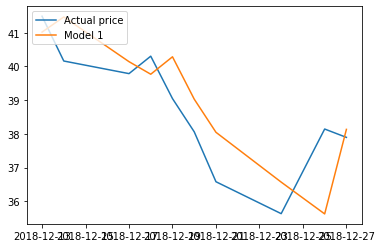

In [40]:
import matplotlib.pyplot as plt

plt.plot(apple_result_df['Close'][990:1000], label = "Actual price")
plt.plot(apple_result_df['Predicted close by m1'][990:1000], label = "Model 1")
plt.legend(loc = 'upper left')

###plt.savefig('ClosePredictedByM1.png')
plt.show()

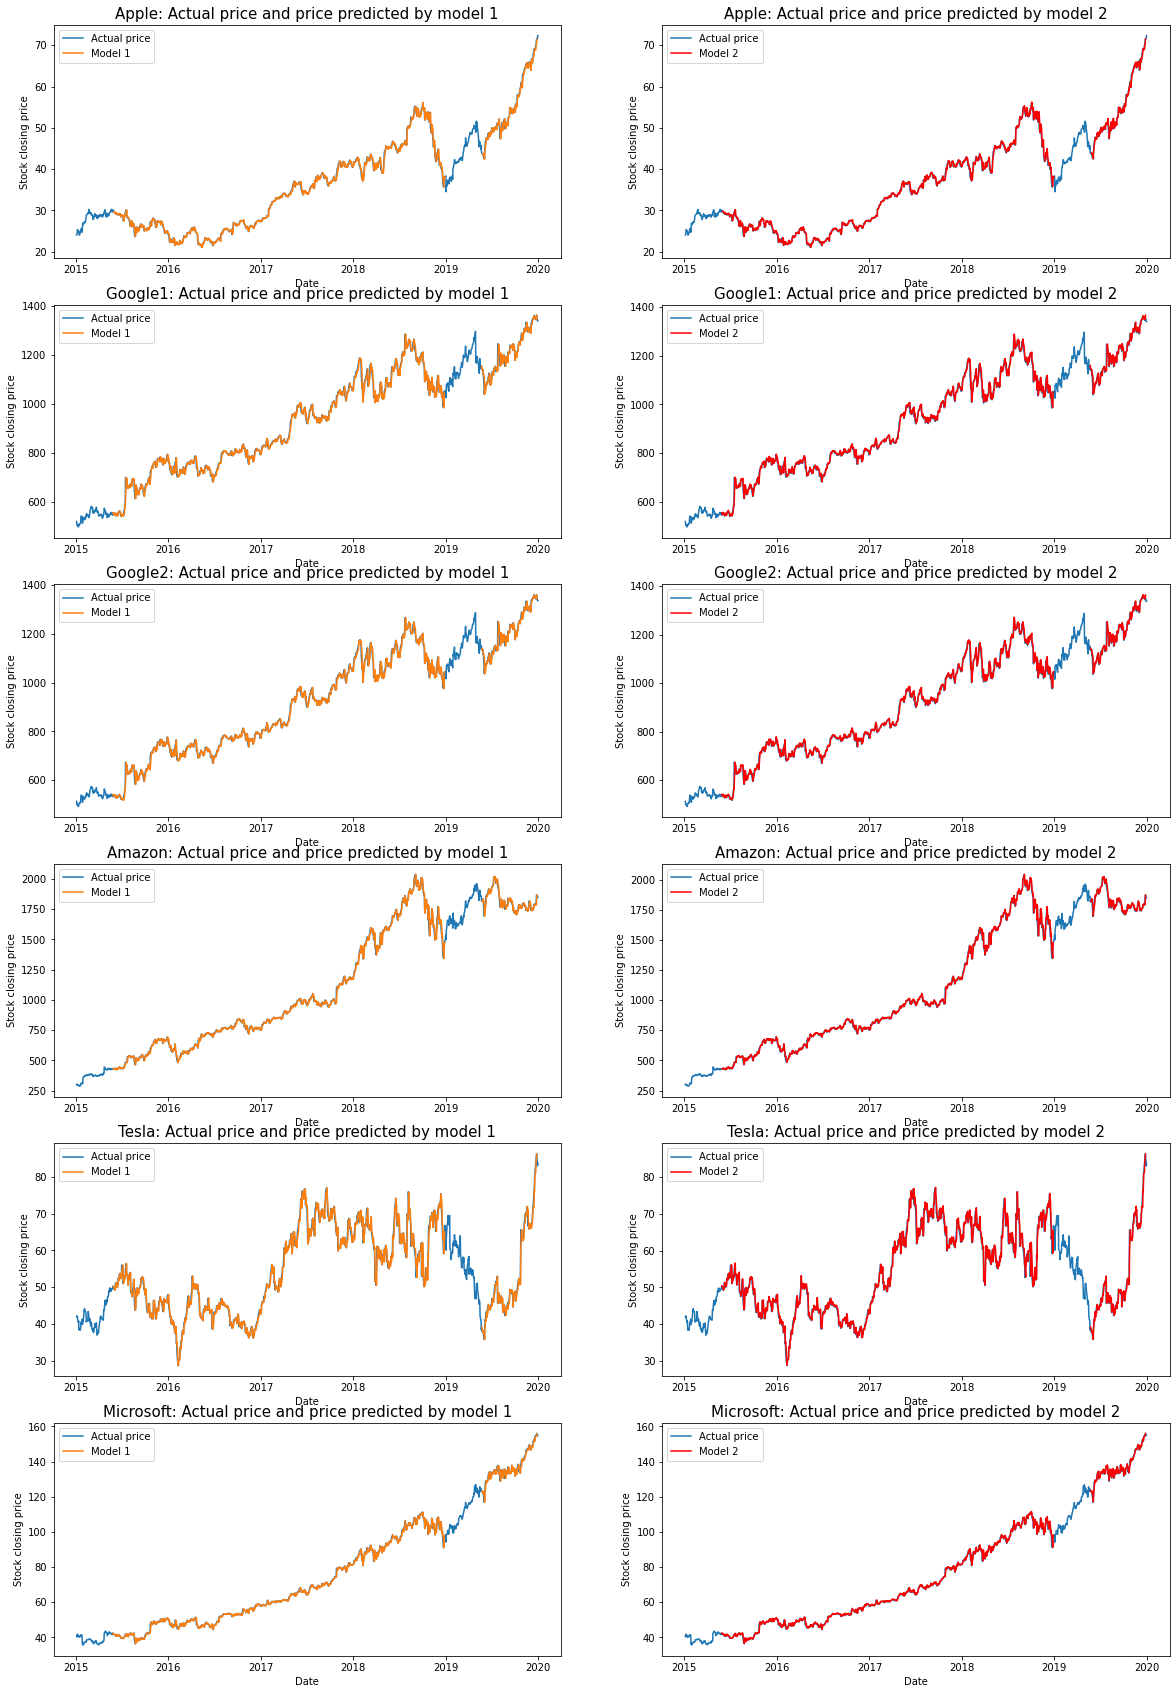

In [36]:
fig, ax = plt.subplots(6,2, figsize=(20,30))

ax[0][0].plot(apple_result_df['Close'], label = "Actual price")
ax[0][0].plot(apple_result_df['Predicted close by m1'], label = "Model 1")
ax[0][0].legend(loc = 'upper left')
ax[0][0].set_xlabel('Date')
ax[0][0].set_ylabel('Stock closing price')
ax[0][0].set_title('Apple: Actual price and price predicted by model 1', fontsize = 15)

ax[0][1].plot(apple_result_df['Close'], label = "Actual price")
ax[0][1].plot(apple_result_df['Predicted close by m2'], label = "Model 2", c = 'red')
ax[0][1].legend(loc = 'upper left')
ax[0][1].set_xlabel('Date')
ax[0][1].set_ylabel('Stock closing price')
ax[0][1].set_title('Apple: Actual price and price predicted by model 2', fontsize = 15)

ax[1][0].plot(google1_result_df['Close'], label = "Actual price")
ax[1][0].plot(google1_result_df['Predicted close by m1'], label = "Model 1")
ax[1][0].legend(loc = 'upper left')
ax[1][0].set_xlabel('Date')
ax[1][0].set_ylabel('Stock closing price')
ax[1][0].set_title('Google1: Actual price and price predicted by model 1', fontsize = 15)

ax[1][1].plot(google1_result_df['Close'], label = "Actual price")
ax[1][1].plot(google1_result_df['Predicted close by m2'], label = "Model 2", c = 'red')
ax[1][1].legend(loc = 'upper left')
ax[1][1].set_xlabel('Date')
ax[1][1].set_ylabel('Stock closing price')
ax[1][1].set_title('Google1: Actual price and price predicted by model 2', fontsize = 15)

ax[2][0].plot(google2_result_df['Close'], label = "Actual price")
ax[2][0].plot(google2_result_df['Predicted close by m1'], label = "Model 1")
ax[2][0].legend(loc = 'upper left')
ax[2][0].set_xlabel('Date')
ax[2][0].set_ylabel('Stock closing price')
ax[2][0].set_title('Google2: Actual price and price predicted by model 1', fontsize = 15)

ax[2][1].plot(google2_result_df['Close'], label = "Actual price")
ax[2][1].plot(google2_result_df['Predicted close by m2'], label = "Model 2", c = 'red')
ax[2][1].legend(loc = 'upper left')
ax[2][1].set_xlabel('Date')
ax[2][1].set_ylabel('Stock closing price')
ax[2][1].set_title('Google2: Actual price and price predicted by model 2', fontsize = 15)

ax[3][0].plot(amazon_result_df['Close'], label = "Actual price")
ax[3][0].plot(amazon_result_df['Predicted close by m1'], label = "Model 1")
ax[3][0].legend(loc = 'upper left')
ax[3][0].set_xlabel('Date')
ax[3][0].set_ylabel('Stock closing price')
ax[3][0].set_title('Amazon: Actual price and price predicted by model 1', fontsize = 15)

ax[3][1].plot(amazon_result_df['Close'], label = "Actual price")
ax[3][1].plot(amazon_result_df['Predicted close by m2'], label = "Model 2", c = 'red')
ax[3][1].legend(loc = 'upper left')
ax[3][1].set_xlabel('Date')
ax[3][1].set_ylabel('Stock closing price')
ax[3][1].set_title('Amazon: Actual price and price predicted by model 2', fontsize = 15)

ax[4][0].plot(tsla_result_df['Close'], label = "Actual price")
ax[4][0].plot(tsla_result_df['Predicted close by m1'], label = "Model 1")
ax[4][0].legend(loc = 'upper left')
ax[4][0].set_xlabel('Date')
ax[4][0].set_ylabel('Stock closing price')
ax[4][0].set_title('Tesla: Actual price and price predicted by model 1', fontsize = 15)

ax[4][1].plot(tsla_result_df['Close'], label = "Actual price")
ax[4][1].plot(tsla_result_df['Predicted close by m2'], label = "Model 2", c = 'red')
ax[4][1].legend(loc = 'upper left')
ax[4][1].set_xlabel('Date')
ax[4][1].set_ylabel('Stock closing price')
ax[4][1].set_title('Tesla: Actual price and price predicted by model 2', fontsize = 15)

ax[5][0].plot(micro_result_df['Close'], label = "Actual price")
ax[5][0].plot(micro_result_df['Predicted close by m1'], label = "Model 1")
ax[5][0].legend(loc = 'upper left')
ax[5][0].set_xlabel('Date')
ax[5][0].set_ylabel('Stock closing price')
ax[5][0].set_title('Microsoft: Actual price and price predicted by model 1', fontsize = 15)

ax[5][1].plot(micro_result_df['Close'], label = "Actual price")
ax[5][1].plot(micro_result_df['Predicted close by m2'], label = "Model 2", c = 'red')
ax[5][1].legend(loc = 'upper left')
ax[5][1].set_xlabel('Date')
ax[5][1].set_ylabel('Stock closing price')
ax[5][1].set_title('Microsoft: Actual price and price predicted by model 2', fontsize = 15)

###plt.savefig('PredictedPricesByModel1&2.png')
plt.show()

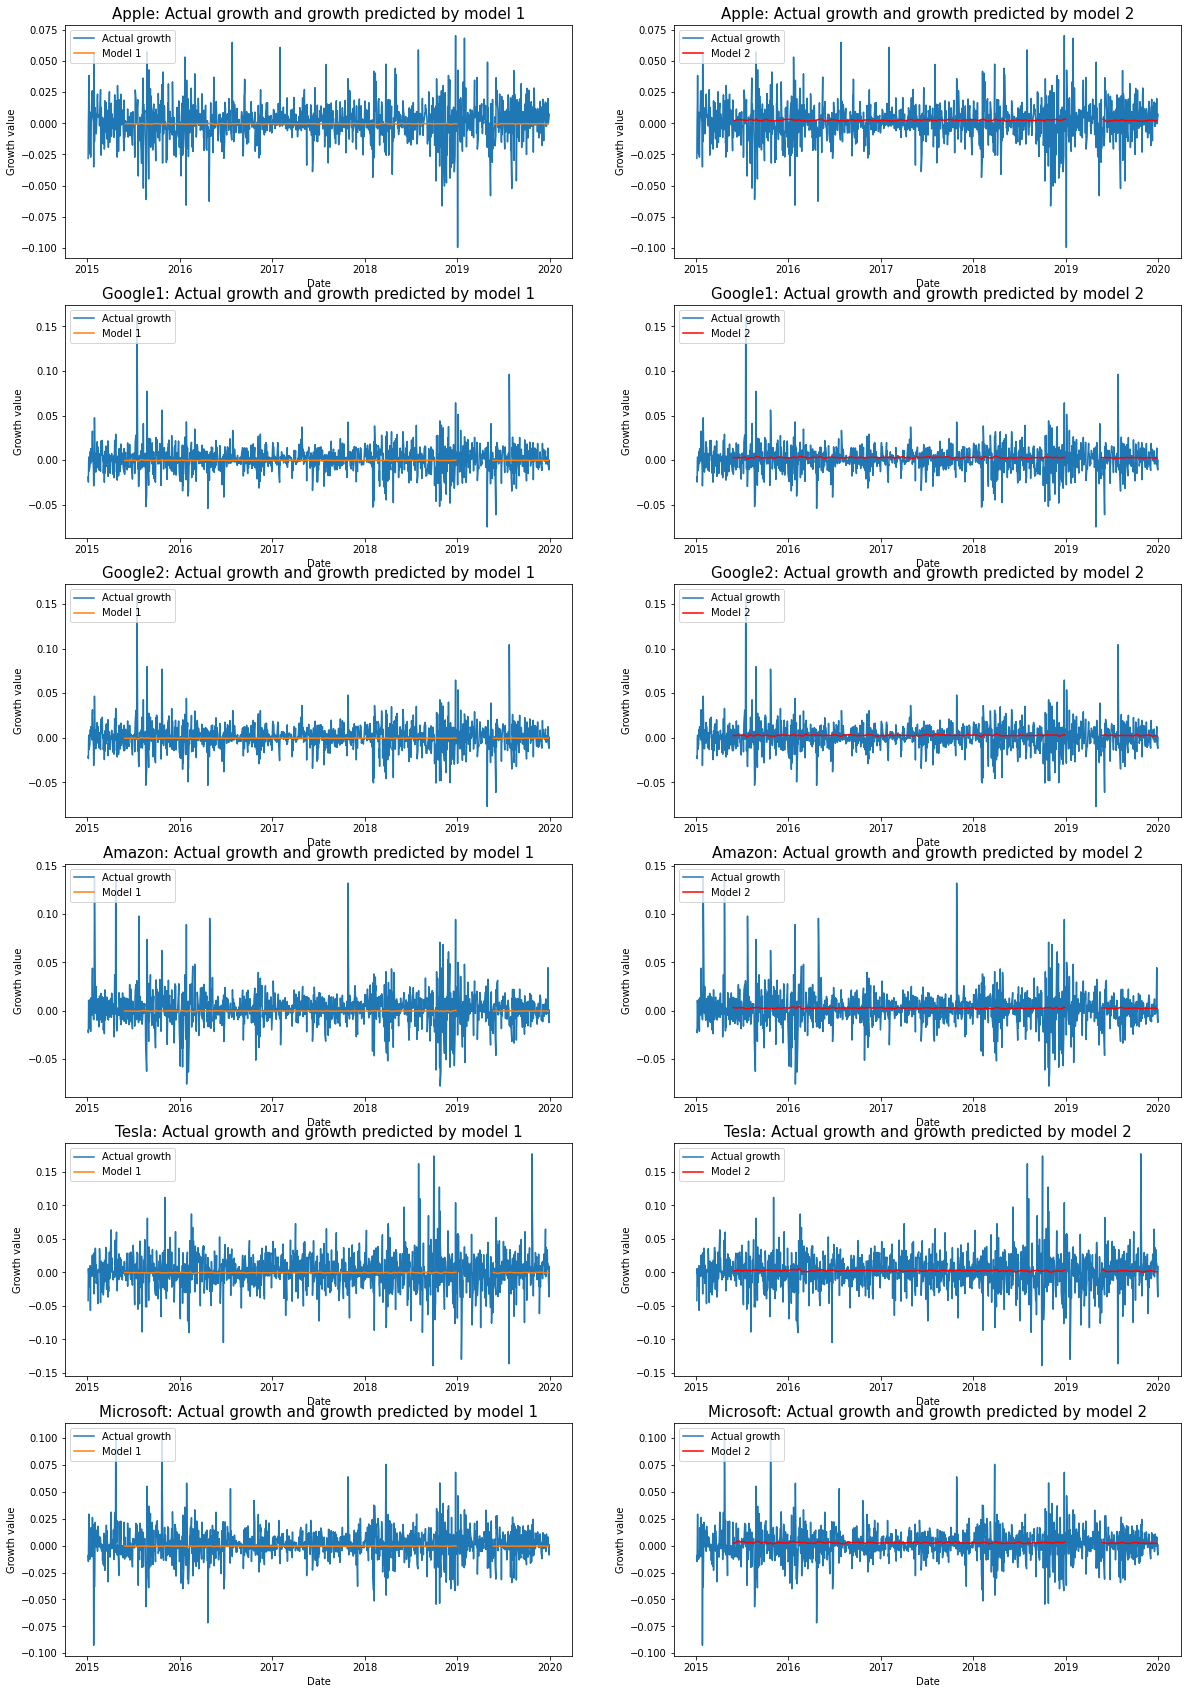

In [41]:
fig, ax = plt.subplots(6,2, figsize=(20,30))

ax[0][0].plot(apple_result_df['Growth'], label = "Actual growth")
ax[0][0].plot(apple_result_df['Predicted growth by m1'], label = "Model 1")
ax[0][0].legend(loc = 'upper left')
ax[0][0].set_xlabel('Date')
ax[0][0].set_ylabel('Growth value')
ax[0][0].set_title('Apple: Actual growth and growth predicted by model 1', fontsize = 15)

ax[0][1].plot(apple_result_df['Growth'], label = "Actual growth")
ax[0][1].plot(apple_result_df['Predicted growth by m2'], label = "Model 2", c = 'red')
ax[0][1].legend(loc = 'upper left')
ax[0][1].set_xlabel('Date')
ax[0][1].set_ylabel('Growth value')
ax[0][1].set_title('Apple: Actual growth and growth predicted by model 2', fontsize = 15)

ax[1][0].plot(google1_result_df['Growth'], label = "Actual growth")
ax[1][0].plot(google1_result_df['Predicted growth by m1'], label = "Model 1")
ax[1][0].legend(loc = 'upper left')
ax[1][0].set_xlabel('Date')
ax[1][0].set_ylabel('Growth value')
ax[1][0].set_title('Google1: Actual growth and growth predicted by model 1', fontsize = 15)

ax[1][1].plot(google1_result_df['Growth'], label = "Actual growth")
ax[1][1].plot(google1_result_df['Predicted growth by m2'], label = "Model 2", c = 'red')
ax[1][1].legend(loc = 'upper left')
ax[1][1].set_xlabel('Date')
ax[1][1].set_ylabel('Growth value')
ax[1][1].set_title('Google1: Actual growth and growth predicted by model 2', fontsize = 15)

ax[2][0].plot(google2_result_df['Growth'], label = "Actual growth")
ax[2][0].plot(google2_result_df['Predicted growth by m1'], label = "Model 1")
ax[2][0].legend(loc = 'upper left')
ax[2][0].set_xlabel('Date')
ax[2][0].set_ylabel('Growth value')
ax[2][0].set_title('Google2: Actual growth and growth predicted by model 1', fontsize = 15)

ax[2][1].plot(google2_result_df['Growth'], label = "Actual growth")
ax[2][1].plot(google2_result_df['Predicted growth by m2'], label = "Model 2", c = 'red')
ax[2][1].legend(loc = 'upper left')
ax[2][1].set_xlabel('Date')
ax[2][1].set_ylabel('Growth value')
ax[2][1].set_title('Google2: Actual growth and growth predicted by model 2', fontsize = 15)

ax[3][0].plot(amazon_result_df['Growth'], label = "Actual growth")
ax[3][0].plot(amazon_result_df['Predicted growth by m1'], label = "Model 1")
ax[3][0].legend(loc = 'upper left')
ax[3][0].set_xlabel('Date')
ax[3][0].set_ylabel('Growth value')
ax[3][0].set_title('Amazon: Actual growth and growth predicted by model 1', fontsize = 15)

ax[3][1].plot(amazon_result_df['Growth'], label = "Actual growth")
ax[3][1].plot(amazon_result_df['Predicted growth by m2'], label = "Model 2", c = 'red')
ax[3][1].legend(loc = 'upper left')
ax[3][1].set_xlabel('Date')
ax[3][1].set_ylabel('Growth value')
ax[3][1].set_title('Amazon: Actual growth and growth predicted by model 2', fontsize = 15)

ax[4][0].plot(tsla_result_df['Growth'], label = "Actual growth")
ax[4][0].plot(tsla_result_df['Predicted growth by m1'], label = "Model 1")
ax[4][0].legend(loc = 'upper left')
ax[4][0].set_xlabel('Date')
ax[4][0].set_ylabel('Growth value')
ax[4][0].set_title('Tesla: Actual growth and growth predicted by model 1', fontsize = 15)

ax[4][1].plot(tsla_result_df['Growth'], label = "Actual growth")
ax[4][1].plot(tsla_result_df['Predicted growth by m2'], label = "Model 2", c = 'red')
ax[4][1].legend(loc = 'upper left')
ax[4][1].set_xlabel('Date')
ax[4][1].set_ylabel('Growth value')
ax[4][1].set_title('Tesla: Actual growth and growth predicted by model 2', fontsize = 15)

ax[5][0].plot(micro_result_df['Growth'], label = "Actual growth")
ax[5][0].plot(micro_result_df['Predicted growth by m1'], label = "Model 1")
ax[5][0].legend(loc = 'upper left')
ax[5][0].set_xlabel('Date')
ax[5][0].set_ylabel('Growth value')
ax[5][0].set_title('Microsoft: Actual growth and growth predicted by model 1', fontsize = 15)

ax[5][1].plot(micro_result_df['Growth'], label = "Actual growth")
ax[5][1].plot(micro_result_df['Predicted growth by m2'], label = "Model 2", c = 'red')
ax[5][1].legend(loc = 'upper left')
ax[5][1].set_xlabel('Date')
ax[5][1].set_ylabel('Growth value')
ax[5][1].set_title('Microsoft: Actual growth and growth predicted by model 2', fontsize = 15)

plt.savefig('PredictedGrowthsByModel1&2.png')
plt.show()

###Results of how wel it predicts up or down

In [106]:
def up_down_correction_score(df, title):
    up_down_correction_array1 = []
    up_down_correction_array2 = []

    for i in range(len(df)):
        if (math.isnan(df['Predicted growth by m1'][i]) == False) or (math.isnan(df['Predicted growth by m1'][i]) == False):
            if (df['Growth'][i] > 0 and df['Predicted growth by m1'][i] > 0) or (df['Growth'][i] < 0 and df['Predicted growth by m1'][i] < 0):
                up_down_correction_array1.append(1)
            if (df['Growth'][i] > 0 and df['Predicted growth by m1'][i] < 0) or (df['Growth'][i] < 0 and df['Predicted growth by m1'][i] > 0):
                up_down_correction_array1.append(0)
            if (df['Growth'][i] > 0 and df['Predicted growth by m2'][i] > 0) or (df['Growth'][i] < 0 and df['Predicted growth by m2'][i] < 0):
                up_down_correction_array2.append(1)
            if (df['Growth'][i] > 0 and df['Predicted growth by m2'][i] < 0) or (df['Growth'][i] < 0 and df['Predicted growth by m2'][i] > 0):
                up_down_correction_array2.append(0)

    correctionscore1 = (np.sum(up_down_correction_array1)/len(up_down_correction_array1)) * 100
    correctionscore2 = (np.sum(up_down_correction_array2)/len(up_down_correction_array2)) * 100

    result = f"{title} Correction score of model 1 is {correctionscore1} % and Correction score of model 2 is {correctionscore2} %"
    return result



In [107]:
up_down_correction_score(apple_result_df, "Apple")

'Apple Correction score of model 1 is 52.38095238095239 % and Correction score of model 2 is 51.8095238095238 %'

In [109]:
up_down_correction_score(google1_result_df, "Google1")

'Google1 Correction score of model 1 is 53.84615384615385 % and Correction score of model 2 is 52.991452991452995 %'

In [108]:
up_down_correction_score(google2_result_df, "Google2")

'Google2 Correction score of model 1 is 54.02843601895735 % and Correction score of model 2 is 53.649289099526065 %'

In [110]:
up_down_correction_score(amazon_result_df, "Amazon")

'Amazon Correction score of model 1 is 55.313092979127134 % and Correction score of model 2 is 55.50284629981025 %'

In [111]:
up_down_correction_score(tsla_result_df, "Tesla")

'Tesla Correction score of model 1 is 49.146110056926 % and Correction score of model 2 is 49.24098671726755 %'

In [112]:
up_down_correction_score(micro_result_df, "Microsoft")

'Microsoft Correction score of model 1 is 55.608820709491845 % and Correction score of model 2 is 55.417066155321194 %'